# i. Perkenalan

**Nama: Hanifah**

**Batch: HCK-004**

---


## Problem Statement 

* Industri perawatan kecantikan telah berkembang pesat dan produk perawatan kulit menjadi salah satu produk yang paling dicari oleh konsumen. Di era digital saat ini, konsumen seringkali mencari ulasan produk sebelum memutuskan untuk membeli. Namun, tidak semua ulasan dapat dipercaya dan kadang-kadang sulit untuk membedakan ulasan yang benar-benar terverifikasi dengan ulasan yang tidak terverifikasi. Oleh karena itu, perlu adanya sebuah sistem yang dapat membantu konsumen untuk membedakan ulasan yang terverifikasi dengan ulasan yang tidak terverifikasi.


## Objective

* Tujuan dari proyek ini adalah untuk membangun sebuah model Natural Language Processing (NLP) yang dapat memprediksi ulasan produk perawatan kulit dari Ulta Beauty dan membedakan ulasan yang terverifikasi dengan ulasan yang tidak terverifikasi. Model ini akan menggunakan dataset ulasan produk yang diambil dari situs web Ulta Beauty. Dengan menggunakan model NLP, diharapkan dapat memprediksi sentimen positif, negatif, atau netral dari ulasan produk perawatan kulit yang diberikan oleh konsumen dan menandai apakah ulasan tersebut terverifikasi atau tidak terverifikasi. Hal ini akan membantu konsumen dalam memilih produk perawatan kulit dan meningkatkan kepercayaan konsumen terhadap ulasan produk yang diberikan.

# ii. Import Library

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sys
import nltk
import random
import keras
import operator
import time
import datetime
import ast
import joblib
import gc
import re


# Preprocess
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding
from sklearn.metrics import classification_report
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter

# Model evaluasi
from keras import models
from keras.models import Model
from keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
from keras import optimizers
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from mlxtend.plotting import plot_confusion_matrix
import collections
from collections import OrderedDict
from collections import Counter

# Plot
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt


%matplotlib inline


import warnings
warnings.filterwarnings(action='ignore')

In [4]:
!pip install phik
!pip install feature_engine
!pip install tensorflow
!pip install summarizer
!pip install transformers
!pip install nltk
!pip install stopwords

nltk.download('punkt')
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('stopwords')
nltk.download('tokenizers')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 KB 10.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.1/280.1 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summarizer: filename=summarizer-0.0.7-py2.py3-none-any.whl size=284224 sha256=6166e5288bcdba37776f3304464a5b2e4445d9abe82f8a3ceccc5b91b6be9c31
  Stored in directory: /root/.cache/pip/wheels/9e/65/2d/389857cbe6fb8c98184cce938481b283faaf777023832e0aea
Successfully built summarizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading tokenizers: Package 'tokenizers' not found
[nltk_data]     in index


False

# iii. Data Loading

In [5]:
# Load dataset dan cek missing value non standard
missing_values = ["n/a", "na", "--",'n/a','NaN','?']
df = pd.read_csv('Ulta Skincare Reviews.csv',na_values = missing_values)
df

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,Much better product than a scrub.,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23
4146,Gentle exfoliant- leaves skin smooth & soft,I've been using this exfoliant for a few month...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23
4147,One of my favorite skincare products of all time.,My skin looks better now than 10 years ago.,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23
4148,Ehhh...,This product was useless for me. I should've k...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23


In [6]:
# Menampilkan 5 data atas
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [7]:
# Menampilkan 5 data bawah
df.tail()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
4145,I would buy this product again,Much better product than a scrub.,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23
4146,Gentle exfoliant- leaves skin smooth & soft,I've been using this exfoliant for a few month...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23
4147,One of my favorite skincare products of all time.,My skin looks better now than 10 years ago.,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23
4148,Ehhh...,This product was useless for me. I should've k...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23
4149,This is the best!!!,This product is amazing! It is the only thing ...,Yes,7 years ago,Mississippi,1,1,Daily Microfoliant,Dermalogica,3/27/23


In [8]:
# Melihat berapa jumlah kolom dan baris
df.shape

(4150, 10)

In [9]:
# Mencari data duplikasi
df[df.duplicated()].shape

(456, 10)

In [10]:
# Drop dulicate
df.drop_duplicates(inplace=True)

In [11]:
# cek kembali data duplikasi
df[df.duplicated()].shape

(0, 10)

In [12]:
# Menampilkan dataset teratas
pd.set_option("display.max.columns",None)
df.head(2)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [13]:
# Memeriksa informasi dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      3694 non-null   object
 1   Review_Text       3692 non-null   object
 2   Verified_Buyer    3694 non-null   object
 3   Review_Date       3694 non-null   object
 4   Review_Location   3693 non-null   object
 5   Review_Upvotes    3694 non-null   int64 
 6   Review_Downvotes  3694 non-null   int64 
 7   Product           3694 non-null   object
 8   Brand             3694 non-null   object
 9   Scrape_Date       3694 non-null   object
dtypes: int64(2), object(8)
memory usage: 317.5+ KB


In [14]:
df.isna().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

- Terdapat beberapa kolom yang missing di antaranya :
    * Review_Text
    * Review_Location 
    
- Dalam hal ini akan di lakukan pengecekan percentage dari masing-masing kolom mising value tersebut mengacu terhadap:

    * MAR (Missing At Random) berarti bahwa kemungkinan terjadinya data yang hilang bergantung pada data yang tersedia dalam dataset. Dalam hal ini, data yang hilang secara acak, tetapi kemungkinan terjadi karena hubungannya dengan data yang tersedia dalam dataset.
    * MNAR (Missing Not At Random) berarti bahwa kemungkinan terjadinya data yang hilang tidak bergantung pada data yang tersedia dalam dataset. Dalam hal ini, data yang hilang tidak dihasilkan secara acak dan tidak dapat dianggap sebagai bagian dari sampel. Oleh karena itu, analisis statistik harus memperhitungkan dampak data yang hilang dalam hasil akhir.


In [15]:
# Mengubah dtype pada datetime
df['Scrape_Date'] = pd.to_datetime(df['Scrape_Date'])

In [16]:
# Mencari letak missing value pada Review_Text
df.loc[df['Review_Text'].isnull()].head(2)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
3684,Received a sample and loved it!,NaN,Yes,4 years ago,"Columbia, SC",0,0,Daily Microfoliant,Dermalogica,2023-03-27
3686,This product works,NaN,Yes,4 years ago,"Columbia, SC",0,0,Daily Microfoliant,Dermalogica,2023-03-27


In [17]:
#Looping untuk mencari % missing value
for i in df.columns:
    if df[i].isnull().sum()>1:
        print(i,"Persent missing value",':',df[i].isnull().sum()*100/df.shape[0],"%",df[i].dtype)

Review_Text Persent missing value : 0.05414185165132648 % object


* Dalam hal ini mising value yang terdapat pada kolom missing hanya ada 0.05% dengan demikian keputusan yang akan di ambil adalah drop missing value.

In [18]:
# Menghapus baris yang memiliki missing value pada kolom 'Review_Text'dan 'Review_Location'
df = df.dropna(subset=['Review_Text','Review_Location'])

In [19]:
df.isna().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

* Missing value telah berhasil didrop

# IV. Exploratory Data Analysis (EDA)

In [20]:
# Mencari informasi datetime
df.Scrape_Date.describe()

count                    3691
unique                      1
top       2023-03-27 00:00:00
freq                     3691
first     2023-03-27 00:00:00
last      2023-03-27 00:00:00
Name: Scrape_Date, dtype: object

* Data informasi diambil pada tgl 2023-03-27

In [21]:
# Summery Statistics
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                                    .background_gradient(subset=['std'], cmap='Reds')\
                                    .background_gradient(subset=['75%'], cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
Review_Upvotes,3691.000000,0.663777,2.332970,0.000000,0.000000,0.000000,1.000000,84.000000
Review_Downvotes,3691.000000,0.180439,0.965226,0.000000,0.000000,0.000000,0.000000,35.000000


* Review_Upvotes: Jumlah suara positif atau "like" yang diberikan oleh pengguna untuk ulasan produk tersebut memiliki rata-rata 0.66 dari total 3691

* Review_Downvotes: Jumlah suara negatif atau "dislike" yang diberikan oleh pengguna untuk ulasan produk tersebut memiliki rata-rata 0.180 dari jumlah total 3691

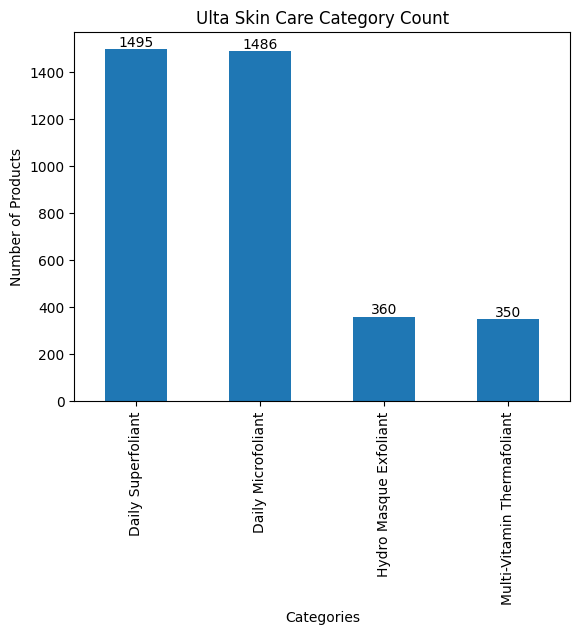

In [22]:
fig, ax = plt.subplots()
df['Product'].value_counts().plot(kind='bar', ax=ax)
ax.set_title('Ulta Skin Care Category Count')
ax.set_ylabel('Number of Products')
ax.set_xlabel('Categories')
ax.bar_label(ax.containers[0])
plt.show()


* Kategori perawatan kulit terbesar di toko online Ulta adalah kategori Daily superfoliant 1495 produk dan daily Microfoliant 1486 produk, diikuti oleh kategori Hydro masque exfoliant dan Multi-vitamin thermafoliant dengan masing-masing lebih dari 300 produk.

* Kategori perawatan kulit yang paling sedikit produknya adalah kategori Hydro masque exfoliant(roduk masker wajah yang mengandung asam salisilat dan enzim papaya, yang membantu mengelupaskan sel kulit mati dan membersihkan pori-pori. ) dan Multi-vitamin thermafoliant (produk exfoliating scrub yang mengandung vitamin A, C, dan E, serta enzim papaya dan asam salisilat. ) dengan masing-masing hanya beberapa produk.

* Selain itu, kategori-kategori perawatan kulit seperti kategori Daily superfoliant produk dan daily Microfoliant produk, juga memiliki jumlah produk yang cukup signifikan.

* Grafik ini dapat membantu dalam melihat distribusi produk pada setiap kategori perawatan kulit di toko online Ulta dan memberikan gambaran umum tentang penjualan produk pada masing-masing kategori. Informasi ini dapat digunakan untuk melakukan analisis lebih lanjut dalam mengoptimalkan penjualan dan pengembangan produk.

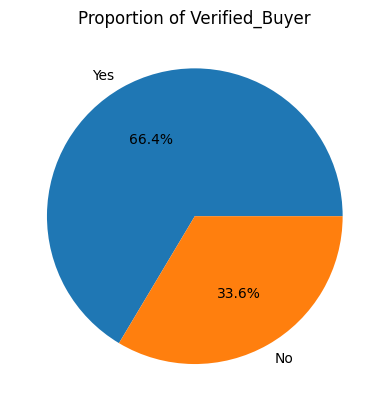

In [23]:
# Proporsi data target
default_counts = df['Verified_Buyer'].value_counts()
plt.pie(default_counts, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('Proportion of Verified_Buyer')
plt.show()

* Mayoritas review produk di Ulta dilakukan oleh pembeli yang terverifikasi ('Verified_Buyer'), sebanyak 66,4% dari total review produk. Sementara itu, review produk dari non-pembeli yang tidak terverifikasi hanya menyumbang sebanyak 33.6% dari total review produk.

* Informasi tentang produk yang terverifikasi dianggap lebih kredibel dibandingkan dengan review dari non-pembeli atau tidak terverifikasi. Oleh karena itu, banyaknya jumlah review dari pembeli yang terverifikasi pada dataset ini dapat membantu memberikan gambaran yang lebih akurat tentang kualitas produk.

* Meskipun mayoritas review produk dilakukan oleh pembeli yang terverifikasi, namun tetap ada sebagian kecil review dari non-pembeli atau tidak terverifikasi. Oleh karena itu, dalam melakukan analisis ulasan produk, sebaiknya mempertimbangkan sumber dan kredibilitas data, serta memperhatikan kemungkinan bias yang mungkin terjadi.

In [24]:
# mengganti nilai 'yes' dengan 1 dan nilai 'no' dengan 0 di kolom 'Verified_Buyer'
df['Verified_Buyer'] = df['Verified_Buyer'].replace({'Yes': 1, 'No': 0})

* Verified buyer merepresentasika : 
    * 0: Verified
    * 1: Not verified

In [25]:
#membuat fungsi untuk plot 
def plotting_Profit(x:str,hue:str):    #ukuran plot diatur dengan menggunakan parameter figsize dengan method subplots
    try:
        fig, ax = plt.subplots(figsize=(26,8))
        colors = [
            "red", "blue"
            # "bright purple", "yellow"     
        ]
        
        ordering =df[x].value_counts()  # menggunakan method value_counts pada kolom x dari DataFrame df dan menghitung frekuensi setiap nilai unik di kolom x
        my_palette = sns.xkcd_palette(colors)
        sns.set_theme(style='whitegrid')
        sns.countplot(data=df, x=x, hue=hue,palette=my_palette, #mengatur urutan nilai di sumbu x berdasarkan urutan kategori pada list order
        order=ordering.sort_values(ascending=True).index, # mengurutkan nilai di sumbu x secara menaik berdasarkan jumlahnya.
        )
        ax.tick_params(axis='x', rotation=45) #sumbu x diputar 45 derajat agar lebih mudah dibaca.
        ax.set_title(f'Count Plot Number of {x} Dengan {hue}',fontsize=20)

        ax.set_xlabel(f"{x}", fontdict={'fontsize':20})
        ax.set_ylabel("Count", fontdict={'fontsize':20})
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            df



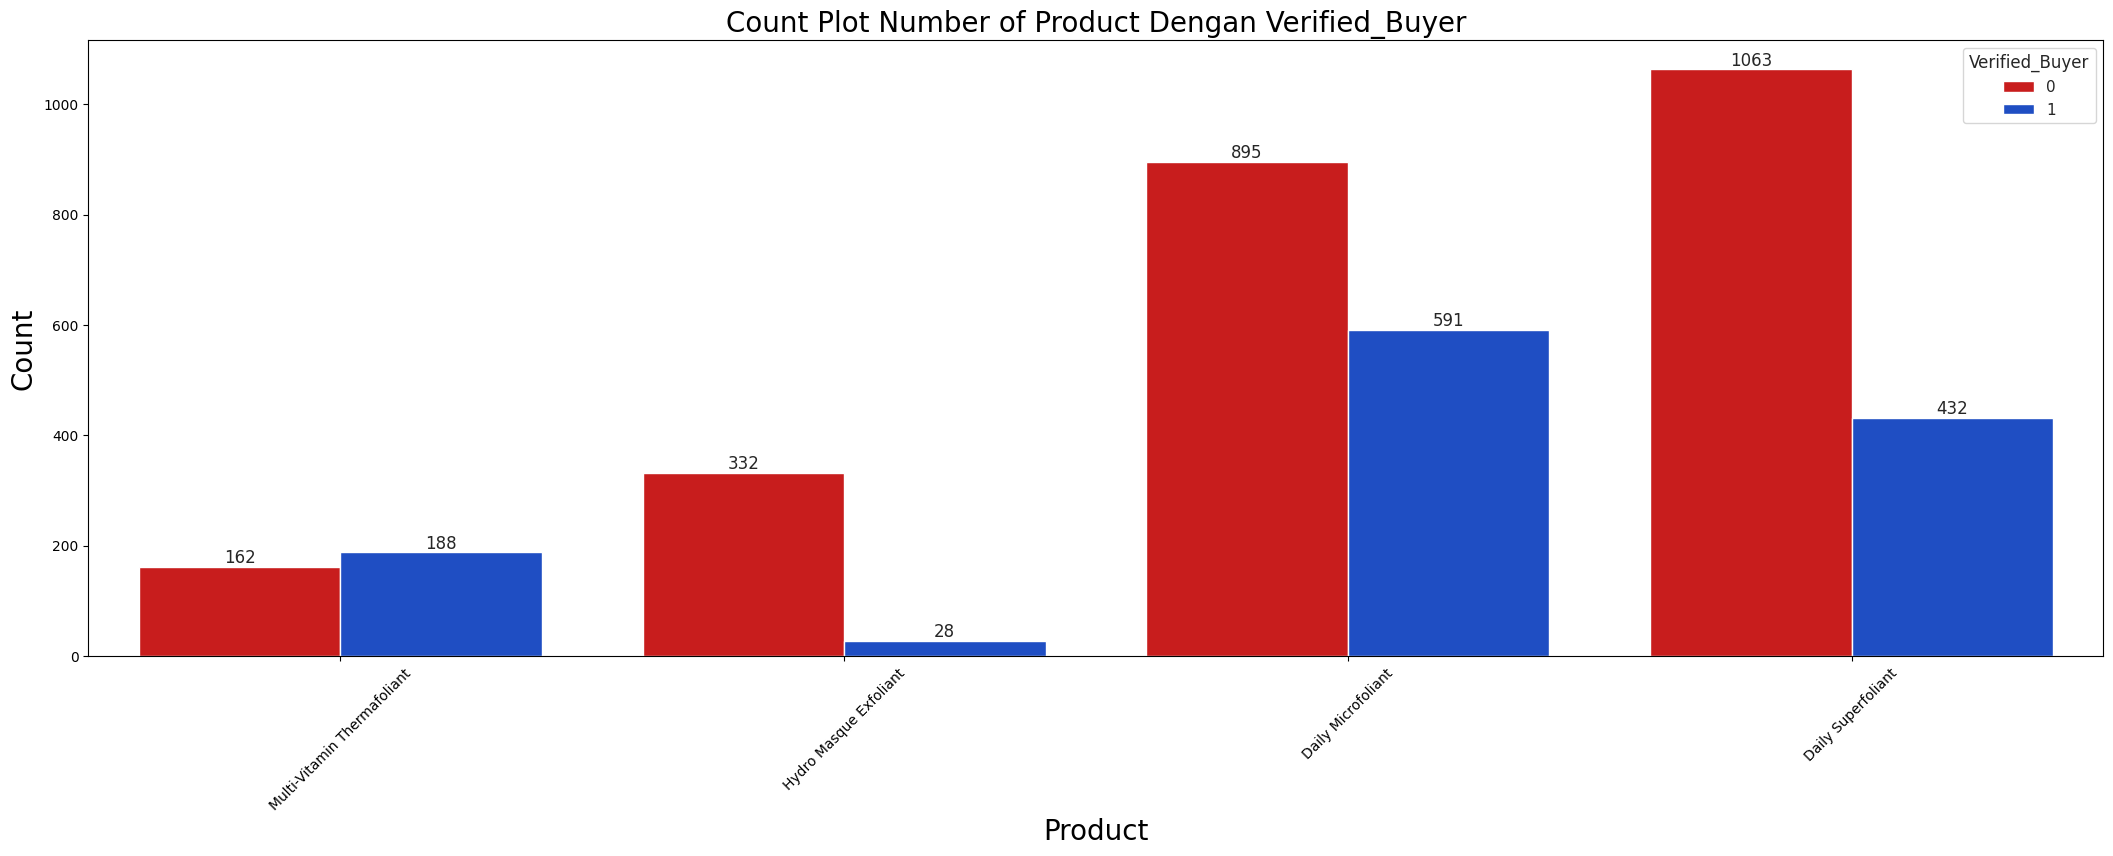

In [26]:
#plot bar dari age dan jumlah churn_risk_score
plotting_Profit('Product','Verified_Buyer') # Plot-1

- Grafik tersebut merupakan sebuah count plot yang menunjukkan jumlah review produk berdasarkan kategori produk dan status verifikasi pembelian ('Verified_Buyer'). Berikut adalah beberapa insight yang dapat diambil dari grafik tersebut:

  * Produk dengan jumlah review terbanyak adalah Daily superfoliant dan daily Microfoliant, diikuti oleh Hydro masque exfoliant dan Multi-vitamin thermafoliant 

  * Mayoritas review untuk setiap kategori produk berasal dari pembeli yang terverifikasi ('Verified_Buyer'). Namun, ada beberapa kategori produk seperti Daily superfoliant dan daily Microfoliant di mana review dari non-pembeli atau tidak terverifikasi lebih banyak.

  * Proporsi review dari pembeli yang terverifikasi dan non-pembeli atau tidak terverifikasi bervariasi pada setiap kategori produk dikatakan imbalance

  * Informasi ini dapat membantu perusahaan dalam mengambil keputusan strategis terkait pengembangan produk, pemasaran, dan meningkatkan kualitas layanan untuk meningkatkan jumlah dan kualitas review dari pembeli yang terverifikasi.

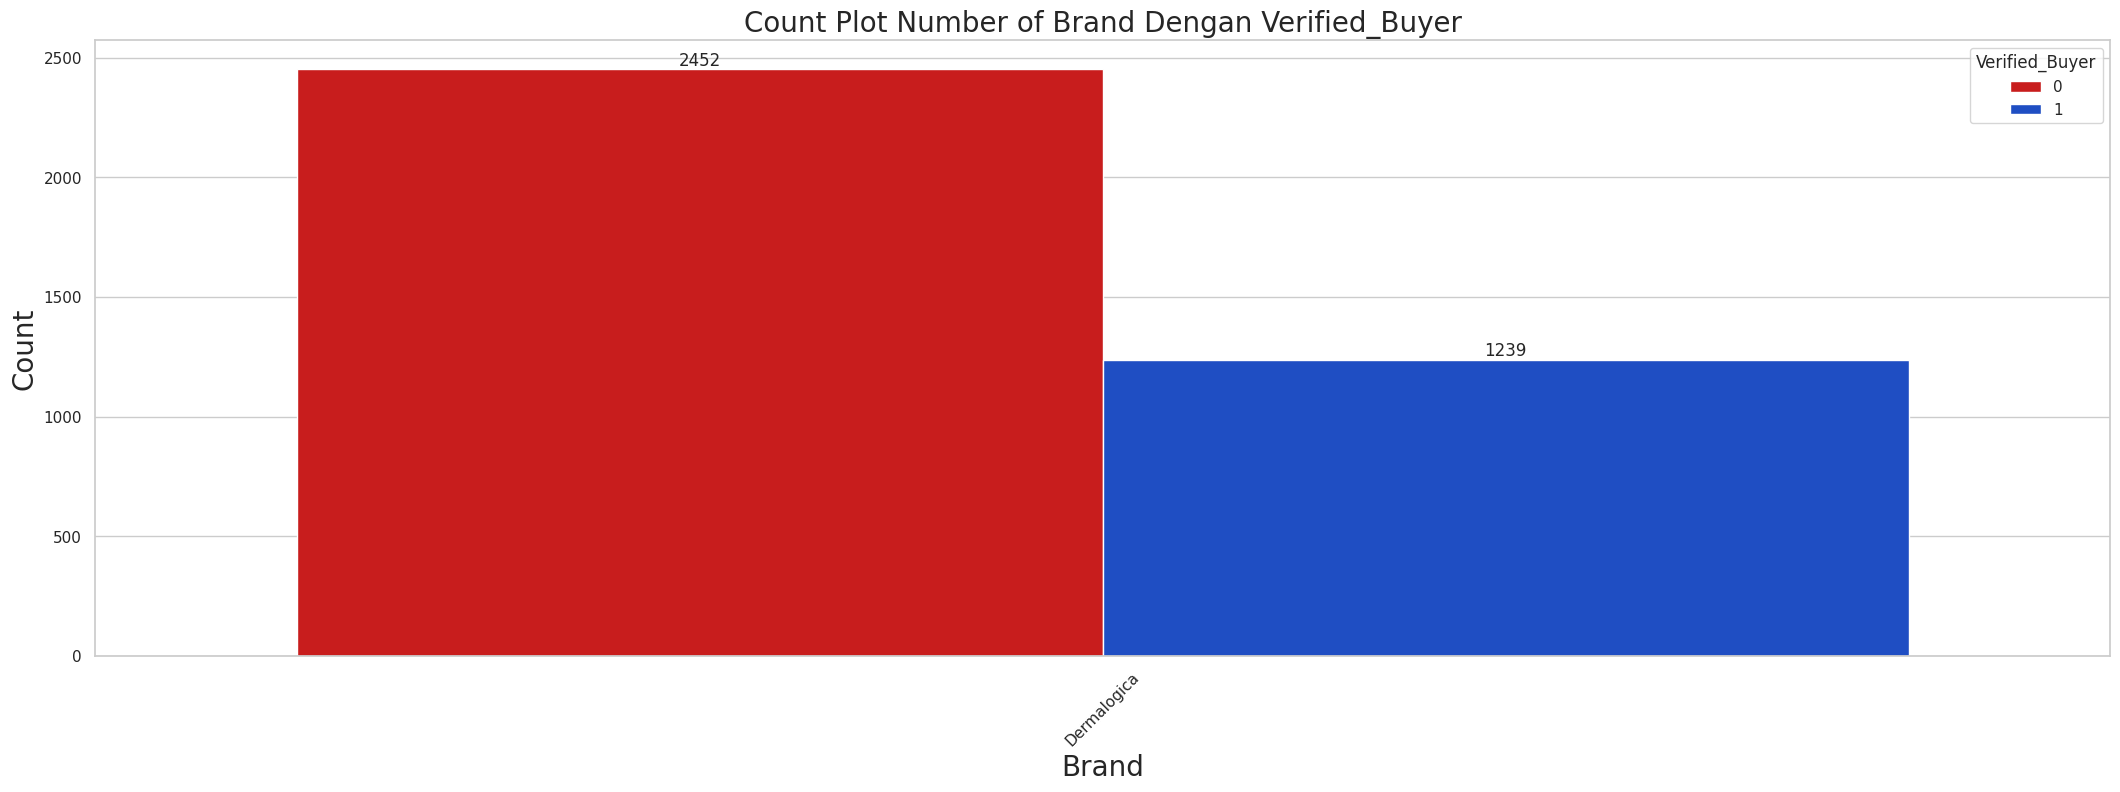

In [27]:
#plot bar dari age dan jumlah churn_risk_score
plotting_Profit('Brand','Verified_Buyer') # Plot-1

* Dilihat dari grafik ini adalah proporsi jumlah produk yang terverifikasi dan tidak terverifikasi pada merek (brand) yang ada dalam memberikan ulasan produk, Dimana jumlah non verivied lebih besar di bandingkan dengan verivide buyer.

In [28]:
df1 = df.copy()

## DATA CLEANING

- Langkah-langkah Preprocessing :

  * Mengubah teks ke lowercase
  * Menghilangkan tanda baca
  * Menghilangkan karakter yang tidak diperlukan
  * Menghilangkan stopwords (token dulu)
  * Stemming

In [29]:
df1.Review_Text.value_counts().reset_index()

,index,Review_Text
0,Great product,6
1,Love it!,5
2,Love this product,3
3,Love it,3
4,I received this as a free sample in￼ an Ulta g...,3
...,...,...
3655,"Great gentle, yet effective exfoliant! Does a ...",1
3656,It's the best daily but mild exfoliant I have ...,1
3657,My skin feels very smooth and ready for the ot...,1
3658,The appearance of my skin has become more smoo...,1


In [31]:
# count verified buyer
df1.Verified_Buyer.value_counts()

0    2452
1    1239
Name: Verified_Buyer, dtype: int64

In [32]:
# Melihat Teks Pertama

print(df1.Review_Text[0])

Love using this on my face while in the shower. Heats up and gives a light scrub nicely


In [33]:
# Melihat Teks pada baris 0-5
for i, row in df1.head(5).iterrows():
    print(row['Review_Text'])

Love using this on my face while in the shower. Heats up and gives a light scrub nicely
Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother
Enjoy this product so much ! I look forward to using it - really feels great.
I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.
This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.


In [34]:
# Melihat Teks pada baris 0-5
for i, row in df1.tail(5).iterrows():
    print(row['Review_Text'])

Much better product than a scrub.
I've been using this exfoliant for a few months now. Depending on the condition of my skin I'll use it anywhere from once a week (if I'm clear) to daily (if I'm breaking out). This stuff is waay more gentle than most exfoliants which honestly I found were making my skin worse from all the harsh abrasives. This microfoliant does none of that- it exfoliates smoothly and gently as often as you need without being harsh or feeling like it's stripping your skin... After I use it my skin feels smooth/soft/calm never irritated/tight/dry.. I'm not a huge fan of the smell (it's not bad, just not great) or the price, but the stuff does last forever and does exactly what it claims so I can't be too mad about that!
My skin looks better now than 10 years ago.
This product was useless for me. I should've known an exfoliant I can use daily would be too gentle for me. I didn't see any worthy results... It was very costly for the results to be unnoticeable. I gave it to

* Jika dilihat dari review text yang terdapat pada baris 5 teratas dan 5 terbawah bisa dikatakan  hampir tidak ada chatwords yang janggal. akan tetapi dalam hal ini kita tidak bisa langsung memutuskan untuk tidak menghandle chatwords yang tidak standard, akan dilakukan handling chatword yang tidak standar dengan bahasa yang umum dilakukan oleh reviewer seperti 'ASAP': 'As Soon As Possible' dll.

In [35]:
# Mengambil 1 teks review
sample = df1['Review_Text'].iloc[1]
sample

"Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother"

In [36]:
# Open chatwords.txt
with open('chatwords.txt') as j:
    data = j.read()

chatwords = ast.literal_eval(data)
chatwords

{'AFAIK': 'As Far As I Know',
 'AFK': 'Away From Keyboard',
 'ASAP': 'As Soon As Possible',
 'ATK': 'At The Keyboard',
 'ATM': 'At The Moment',
 'A3': 'Anytime, Anywhere, Anyplace',
 'BAK': 'Back At Keyboard',
 'BBL': 'Be Back Later',
 'BBS': 'Be Back Soon',
 'BFN': 'Bye For Now',
 'B4N': 'Bye For Now',
 'BRB': 'Be Right Back',
 'BRT': 'Be Right There',
 'BTW': 'By The Way',
 'B4': 'Before',
 'CU': 'See You',
 'CUL8R': 'See You Later',
 'CYA': 'See You',
 'FAQ': 'Frequently Asked Questions',
 'FC': 'Fingers Crossed',
 'FWIW': 'For What Its Worth',
 'FYI': 'For Your Information',
 'GAL': 'Get A Life',
 'GG': 'Good Game',
 'GN': 'Good Night',
 'GMTA': 'Great Minds Think Alike',
 'GR8': 'Great!',
 'G9': 'Genius',
 'IC': 'I See',
 'ICQ': 'I Seek you (also a chat program)',
 'ILU': 'ILU: I Love You',
 'IMHO': 'In My Honest/Humble Opinion',
 'IMO': 'In My Opinion',
 'IOW': 'In Other Words',
 'IRL': 'In Real Life',
 'KISS': 'Keep It Simple, Stupid',
 'LDR': 'Long Distance Relationship',
 'LMA

* Berikut adalah chatword yang kemungkinan besar ditulis oleh reviewer dalam memberikan ulasan pada sebuah product.

In [37]:
temp=[]
# mengganti kata-kata lalu dipecah menjadi list kata-kata 
for chat in sample.split():
# looping pada chatwords, mengubahnya menjadi huruf besar 
   if chat.upper() in chatwords:
      temp.append(chatwords[chat.upper()])
   else:
      temp.append(chat)

sample = " ".join(temp)
sample

"Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother"

In [38]:
# Mengganti semua huruf menjadi huruf kecil
sample = sample.lower()
sample

"even better than the daily microfoliant. i'm obsessed. my skin is so much smoother"

In [39]:
#open abbreviation.txt
with open('abbreviation.txt') as abb:
    ab = abb.read()

abbreviation =  ast.literal_eval(ab)
abbreviation

{"what's": 'what is',
 "what're": 'what are',
 "who's": 'who is',
 "who're": 'who are',
 "where's": 'where is',
 "where're": 'where are',
 "when's": 'when is',
 "when're": 'when are',
 "how's": 'how is',
 "how're": 'how are',
 "i'm": 'i am',
 "we're": 'we are',
 "you're": 'you are',
 "they're": 'they are',
 "it's": 'it is',
 "he's": 'he is',
 "she's": 'she is',
 "that's": 'that is',
 "there's": 'there is',
 "there're": 'there are',
 "i've": 'i have',
 "we've": 'we have',
 "you've": 'you have',
 "they've": 'they have',
 "who've": 'who have',
 "would've": 'would have',
 "not've": 'not have',
 "i'll": 'i will',
 "we'll": 'we will',
 "you'll": 'you will',
 "he'll": 'he will',
 "she'll": 'she will',
 "it'll": 'it will',
 "they'll": 'they will',
 "isn't": 'is not',
 "wasn't": 'was not',
 "aren't": 'are not',
 "weren't": 'were not',
 "can't": 'can not',
 "couldn't": 'could not',
 "don't": 'do not',
 "didn't": 'did not',
 "shouldn't": 'should not',
 "wouldn't": 'would not',
 "doesn't": 'does n

* Berikut adalah text abbreviation, Tujuan dari handling abbreviation pada NLP adalah untuk mengubah kata-kata yang disingkat menjadi kata-kata yang lengkap sehingga dapat membantu pemrosesan teks dan memperbaiki akurasi model. Hal ini dilakukan karena seringkali penggunaan singkatan dalam teks dapat mempersulit pemrosesan teks dan menimbulkan ambiguitas dalam arti. Dengan mengubah kata-kata yang disingkat menjadi kata-kata lengkap, model NLP dapat memahami teks dengan lebih baik dan menghasilkan keluaran yang lebih akurat.

In [40]:
temp2=[]
# mengganti kata-kata lalu dipecah menjadi list kata-kata 
for ab2 in sample.split():
# Loop pada abbreviaton  
   if ab2 in abbreviation:
      temp2.append(abbreviation[ab2])
   else:
      temp2.append(ab2)

sample = " ".join(temp2)
sample

'even better than the daily microfoliant. i am obsessed. my skin is so much smoother'

* Dapat kita lihat tanda(') pada i'am telah berubah menjadi i am.

In [41]:
#menghilangkan seluruh tanda baca
sample = re.sub("[^a-zA-Z]",' ', sample)
sample = re.sub('\[[^]]*\]', ' ', sample)
sample

'even better than the daily microfoliant  i am obsessed  my skin is so much smoother'

In [42]:
#menghilangkan baris baru
sample = re.sub(r"\\n", " ", sample)
#menghilangkan whitespace
sample = sample.strip()

#teks yang sudah bersih dari tanda baca
sample = ' '.join(sample.split())
sample

'even better than the daily microfoliant i am obsessed my skin is so much smoother'

In [43]:
# stopword
stop_words = stopwords.words('english')

In [44]:
#menghilangkan stopwords
tokens = word_tokenize(sample)
stop_words2 = ' '.join([word for word in tokens if word not in stop_words])

print('Document       (Size :', len(sample.split()),') : ', sample,'\n')
print('Tokens         (Size :', len(tokens),') : ', tokens,'\n')
print('Cleaned Tokens (Size :', len(stop_words2.split()),') : ', stop_words2)

Document       (Size : 15 ) :  even better than the daily microfoliant i am obsessed my skin is so much smoother 

Tokens         (Size : 15 ) :  ['even', 'better', 'than', 'the', 'daily', 'microfoliant', 'i', 'am', 'obsessed', 'my', 'skin', 'is', 'so', 'much', 'smoother'] 

Cleaned Tokens (Size : 8 ) :  even better daily microfoliant obsessed skin much smoother


In [45]:
#normalisasi stemming
ps = PorterStemmer()
example_ps = [ps.stem(word) for word in stop_words2.split()]
#normalisasi lemmatization
lem = WordNetLemmatizer()
example_lem = [lem.lemmatize(word) for word in stop_words2.split()]

stem = pd.DataFrame({'Original':stop_words2.split(),'Stemming':example_ps,'Lemmatization':example_lem})
stem.head(7)

,Original,Stemming,Lemmatization
0,even,even,even
1,better,better,better
2,daily,daili,daily
3,microfoliant,microfoli,microfoliant
4,obsessed,obsess,obsessed
5,skin,skin,skin
6,much,much,much


* Tujuan dari code tersebut adalah melakukan normalisasi teks pada kata-kata yang ada di dalam variabel stop_words2. Normalisasi dilakukan dengan menggunakan dua metode, yaitu stemming dan lemmatization.

* Stemming merupakan proses menghilangkan imbuhan pada kata (suffixes atau prefixes) sehingga hanya menyisakan kata dasarnya (root word). Proses stemming dilakukan dengan memanggil metode PorterStemmer() dari modul nltk.stem. Setiap kata pada stop_words2 diproses dengan metode ps.stem(word) dan hasilnya disimpan dalam variabel example_ps.

* Lemmatization merupakan proses mengembalikan kata ke bentuk dasarnya (base word) dengan mempertimbangkan konteks kalimat. Proses lemmatization dilakukan dengan memanggil metode WordNetLemmatizer() dari modul nltk.stem. Setiap kata pada stop_words2 diproses dengan metode lem.lemmatize(word) dan hasilnya disimpan dalam variabel example_lem.

* Kedua hasil normalisasi stemming dan lemmatization tersebut disimpan dalam sebuah dataframe stem. Kolom pertama merupakan kata-kata asli dari stop_words2 yang dipisahkan dengan split(), kolom kedua merupakan hasil stemming, dan kolom ketiga merupakan hasil lemmatization. DataFrame tersebut ditampilkan dengan memanggil metode head() untuk menampilkan 7 baris pertama.

In [46]:
def check_chatwords(text):
    temp=[]
    for chat in text.split():
        if chat.upper() in chatwords: # check if the word is a chat word
            temp.append(chatwords[chat.upper()]) # replace the word with its full form
        else:
            temp.append(chat)
    return " ".join(temp) # join the words into a string

def lower(text):
    data = text.lower() # convert the text into lowercase
    return data 

def check_abbr(text):
    temp2=[]
    for abbr in text.split():
      if abbr in abbreviation: # check if the word is an abbreviation
          temp2.append(abbreviation[abbr]) # replace the word with its full form
      else:
          temp2.append(abbr)
    return " ".join(temp2) # join the words into a string

def check_punctuation(text):
    data = re.sub("[^a-zA-Z]",' ', text) # replace non-alphabetic characters with space
    data = re.sub('\[[^]]*\]', ' ', data) # replace text within square brackets with space
    data = re.sub(r"\\n", " ", data) # replace new line characters with space
    data = re.sub('[^\w\s]', ' ', data) # (regular expression) to replace any character that is not a letter, number, or space with a blank space in the data string.
    data = data.strip() # remove leading and trailing spaces
    data = ' '.join(data.split()) # replace multiple spaces with single space
    return data   

def token_stopwords_lemma(text):
    tokens = word_tokenize(text) # tokenize the text into words
    stop_words2 = ' '.join([word for word in tokens if word not in stop_words]) # remove stop words
    data = [lem.lemmatize(word) for word in stop_words2.split()] # lemmatize the words
    data = ' '.join(data) # join the words into a string
    return data


* Pengolahan teks seperti ini berguna untuk membersihkan dan mempersiapkan data teks sebelum diolah lebih lanjut, seperti dalam analisis sentimen, klasifikasi teks, atau pengolahan bahasa alami lainnya. Hal ini juga menunjukkan bahwa pengolahan teks sering kali membutuhkan beberapa tahap, seperti penghapusan stopwords, konversi huruf kecil, penghapusan karakter non-alfanumerik, dan lain-lain.

In [47]:
df1['Review_Text'] = df1['Review_Text'].apply(lambda j: check_chatwords(j))
df1['Review_Text'] = df1['Review_Text'].apply(lambda k: lower(k))
df1['Review_Text'] = df1['Review_Text'].apply(lambda l: check_abbr(l))
df1['Review_Text'] = df1['Review_Text'].apply(lambda m: check_punctuation(m))
df1['Review_Text'] = df1['Review_Text'].apply(lambda n: token_stopwords_lemma(n))

* Code di atas merepresentasikan:

  - Baris pertama digunakan untuk memanggil fungsi check_chatwords yang akan memeriksa apakah kata pada teks termasuk dalam chatwords, yaitu sebuah kamus yang berisi kata-kata slang/chat yang umum digunakan dalam obrolan online. Jika kata pada teks termasuk dalam kamus chatwords, maka kata tersebut akan diganti dengan kata dalam kamus chatwords.
  - Baris kedua memanggil fungsi lower untuk mengubah semua karakter pada teks menjadi huruf kecil.
  - Baris ketiga memanggil fungsi check_abbr untuk memeriksa apakah kata pada teks merupakan singkatan. Jika kata pada teks merupakan singkatan, maka singkatan tersebut akan diganti dengan kata lengkapnya.
  - Baris keempat memanggil fungsi check_punctuation untuk menghapus semua tanda baca pada teks dan mengganti karakter yang bukan huruf dengan spasi.
  - Baris kelima terakhir memanggil fungsi token_stopwords_lemma yang melakukan tokenisasi pada teks, menghapus kata-kata stopword, dan melakukan lemmatisasi pada setiap kata pada teks. Fungsi ini akan mengembalikan teks yang telah dipreproses dan siap untuk digunakan pada tahap analisis selanjutnya.


In [48]:
# memperlihatkan 5 data yang sudah dibersihkan
df1['Review_Text'].sample(6)

3091    product interesting initially caught attention...
545     first let say process using hydro masque delig...
3887    easy use work great glad ulta employee recomme...
2589    thirty something year old skin care come foref...
185     introduced product recently facial loved left ...
1454                                        nice cleanser
Name: Review_Text, dtype: object

## Text Tokenization

In [49]:
# mengaplikasikan fungsi nltk.word_tokenize
df1["Tokenized_Text"] = df1["Review_Text"].apply(nltk.word_tokenize)
# menyimpan fungsi pada dalam kolom baru bernama NLTK_Text
df1['NLTK_Text'] = df1['Tokenized_Text'].apply(nltk.Text)

In [50]:
# menampilkan 15 token yang paling umum ada
Counter(" ".join(df1['Review_Text']).split()).most_common(15)

[('skin', 4840),
 ('product', 2702),
 ('use', 1844),
 ('love', 1315),
 ('feel', 1291),
 ('face', 1168),
 ('using', 1082),
 ('like', 849),
 ('smooth', 823),
 ('soft', 697),
 ('really', 682),
 ('great', 670),
 ('dermalogica', 658),
 ('dry', 633),
 ('make', 632)]

## Bigram Collection

* Bigram dalam NLP (Natural Language Processing) adalah sekumpulan dua kata yang muncul berdampingan dalam sebuah teks atau kalimat. Bigram merupakan salah satu jenis dari n-gram, yang terdiri dari n kata yang muncul berdampingan dalam teks atau kalimat. Bigram sering digunakan dalam pemodelan bahasa dan pengenalan teks untuk memprediksi kata selanjutnya dalam sebuah kalimat. Dalam pemodelan bahasa, frekuensi kemunculan bigram dapat digunakan untuk menghitung probabilitas kemunculan kata selanjutnya dalam sebuah kalimat. Contoh bigram dalam kalimat "Saya makan nasi" adalah "Saya makan", "makan nasi".

In [51]:
# memfilter hanya Product = "Daily Microfoliant
mvt = df1.query('Product == "Daily Microfoliant"')

In [52]:
# Membuat objek Counter 
bigrams = collections.Counter()
# loop untuk setiap kalimat atau phrase
for phrase in mvt["NLTK_Text"]:
    try:
        bigrams.update(nltk.bigrams(phrase))
    except StopIteration:
        # Handle the end of the iterator
        print("End of iterator")
# Mengurutkan setiap bigram berdasarkan frekuensinya secara menurun   
bigrams_sorted = sorted(bigrams.items(),key=operator.itemgetter(1),reverse=True)
# Mengambil 17 bigram pertama dari hasil pengurutan di atas
bigrams_sorted[0:17]

[(('skin', 'feel'), 231),
 (('sensitive', 'skin'), 201),
 (('leaf', 'skin'), 114),
 (('every', 'day'), 111),
 (('make', 'skin'), 111),
 (('love', 'product'), 97),
 (('gifted', 'dermalogica'), 92),
 (('use', 'every'), 87),
 (('gentle', 'enough'), 86),
 (('daily', 'microfoliant'), 86),
 (('using', 'product'), 79),
 (('skin', 'feeling'), 78),
 (('use', 'daily'), 76),
 (('highly', 'recommend'), 75),
 (('skin', 'look'), 70),
 (('dry', 'skin'), 64),
 (('time', 'week'), 61)]

* Code di atas menggunakan library NLTK (Natural Language Toolkit) untuk memproses teks dari sebuah variabel mvt["NLTK_Text"] dan menghitung frekuensi kemunculan dari bigram atau pasangan dua kata yang berurutan di dalam teks tersebut.

## Bigram Collection Continued

In [53]:
# melakukan pencarian bigram dari seluruh teks dengan filter kata "feeling"
feel_reviews = []

for bigram in bigrams_sorted:
    if 'feeling' in bigram[0][0]:
        feel_reviews.append(bigram)
        
feel_reviews[0:17]

[(('feeling', 'smooth'), 25),
 (('feeling', 'clean'), 18),
 (('feeling', 'soft'), 15),
 (('feeling', 'super'), 7),
 (('feeling', 'really'), 6),
 (('feeling', 'smoother'), 5),
 (('feeling', 'fresh'), 5),
 (('feeling', 'skin'), 5),
 (('feeling', 'like'), 5),
 (('feeling', 'dry'), 3),
 (('feeling', 'looking'), 3),
 (('feeling', 'refreshed'), 3),
 (('feeling', 'supple'), 2),
 (('feeling', 'softer'), 2),
 (('feeling', 'brand'), 2),
 (('feeling', 'stripped'), 2),
 (('feeling', 'good'), 2)]

* Code diatas bertujuan untuk melakukan pencarian bigram dari seluruh teks yang ada dan memfilter hanya bigram yang mengandung kata "feeling". Kemudian bigram tersebut dimasukkan ke dalam list feel_reviews. Pada akhirnya, kode tersebut akan menampilkan 17 bigram yang terpilih dalam list feel_reviews.

In [54]:
# membuat bigram yang mengandung kata 'feeling' dan memiliki frekuensi kemunculan minimal 2.
feel_bigram = []
feel_freq = []

for review in feel_reviews:
    if review[1] >= 2:
        feel_freq.append(review[1])
        feel_bigram.append(' '.join(review[0]))
    
df1_feel_bg = pd.DataFrame({'Bigram':feel_bigram, 'Frequency':feel_freq})

* Tujuan dari kode tersebut adalah untuk membuat daftar bigram yang mengandung kata 'feeling' dan memiliki frekuensi kemunculan minimal 2. Kemudian dibuat sebuah DataFrame dengan kolom 'Bigram' dan 'Frequency' yang berisi bigram yang memenuhi kriteria tersebut dan frekuensi kemunculannya.

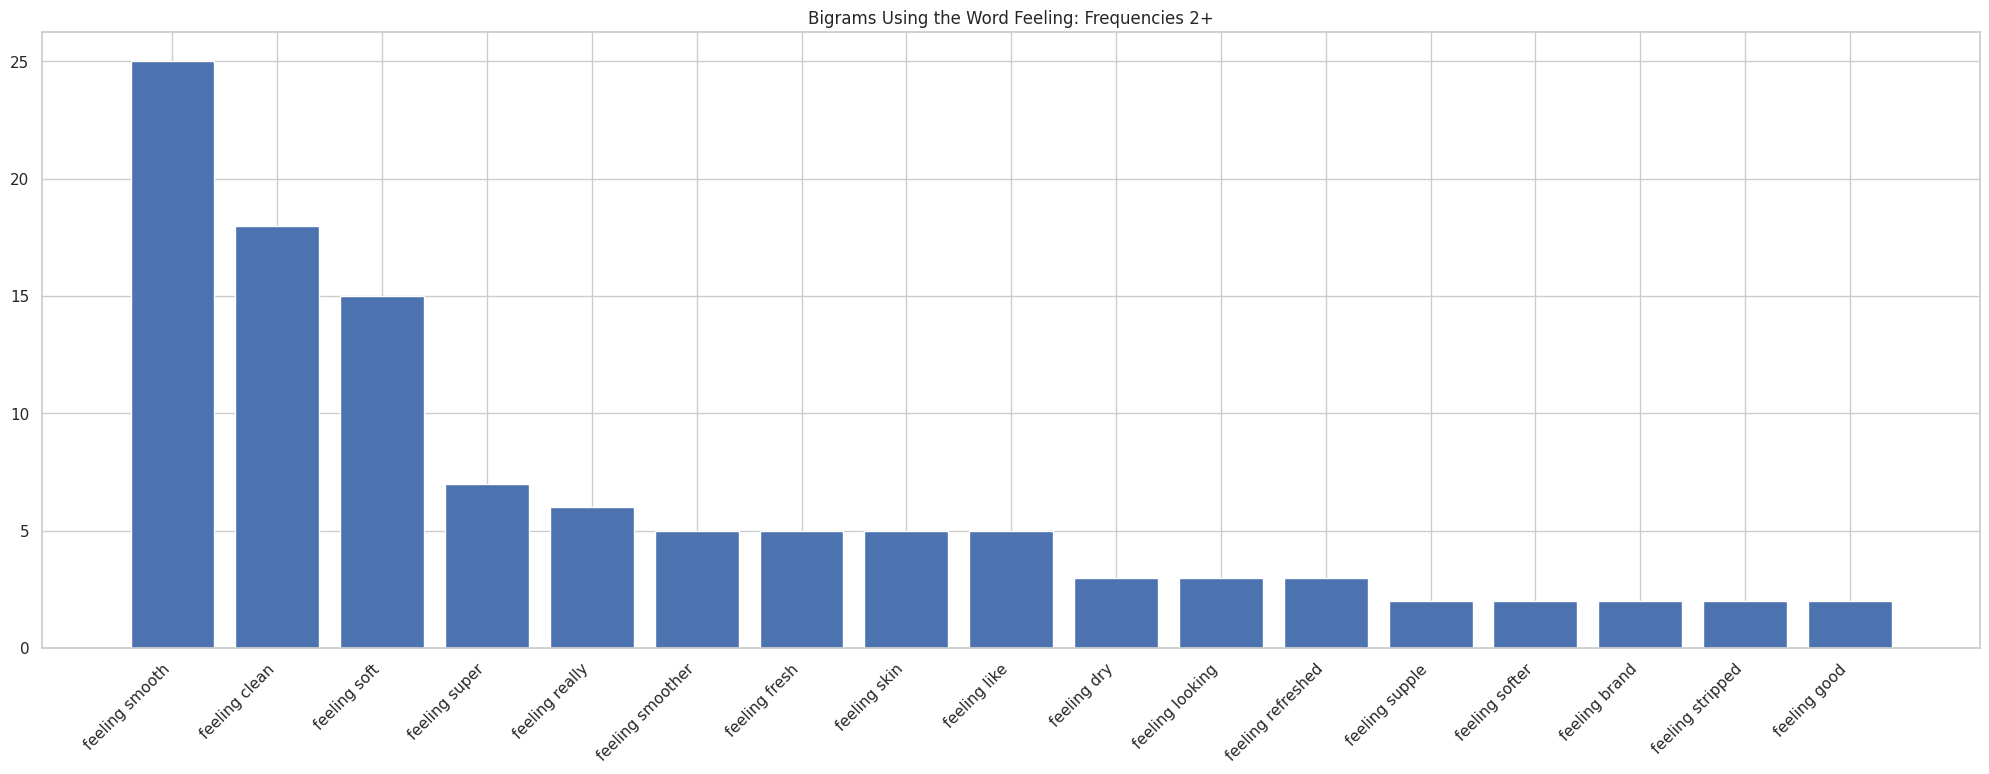

In [55]:
# membuat figure baru dengan ukuran 10x8 inch
plt.figure(figsize=(25, 8))

# membuat bar plot
plt.bar(df1_feel_bg['Bigram'], height=df1_feel_bg['Frequency'])

# memberikan judul pada plot
plt.title('Bigrams Using the Word Feeling: Frequencies 2+')

# membuat output x-axis menyamping
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

# menampilkan plot
plt.show()

* Grafik tersebut menunjukkan frekuensi dari bigram yang menggunakan kata "feeling" dengan frekuensi 2 atau lebih. Setiap bar pada grafik merepresentasikan sebuah bigram, dan tinggi bar menunjukkan frekuensi kemunculan bigram tersebut. Dari grafik, dapat dilihat bahwa bigram yang paling sering muncul adalah "feeling smooth", "feeling clean", dan "feeling soft". Hal ini dapat memberikan insight bahwa kebanyakan pengguna dalam dataset merasa seperti "feeling smooth", "feeling clean", dan "feeling soft" ketika menggunakan produk, yang dapat digunakan sebagai masukan dalam pengembangan produk yang lebih baik dan pengalaman pengguna yang lebih memuaskan.

## Trigram Collection

* Tujuan dari Trigram Collection adalah untuk menemukan urutan tiga kata yang sering muncul bersama dalam dataset teks tertentu. Trigram Collection dapat membantu dalam pemrosesan bahasa alami dan analisis teks dengan mengidentifikasi pola kata yang lebih kompleks daripada unigram atau bigram. Dengan mengetahui trigram yang paling sering muncul dalam dataset, dapat membantu dalam memahami topik dan konteks yang lebih spesifik dari dokumen.

In [56]:
mvt_1year = mvt.query('Review_Date == "1 year ago"')

In [57]:
# menghitung frekuensi dari setiap trigram yang muncul
trigrams = collections.Counter()
for phrase in mvt_1year['NLTK_Text']:
    trigrams.update(nltk.trigrams(phrase))
    
trigrams_sorted = sorted(trigrams.items(),key=operator.itemgetter(1),reverse=True)
trigrams_sorted[0:17]

[(('make', 'skin', 'feel'), 34),
 (('dermalogica', 'ulta', 'team'), 30),
 (('skin', 'feel', 'soft'), 29),
 (('leaf', 'skin', 'feeling'), 25),
 (('product', 'gifted', 'dermalogica'), 21),
 (('dermalogica', 'daily', 'microfoliant'), 21),
 (('gentle', 'enough', 'use'), 18),
 (('gifted', 'dermalogica', 'ulta'), 17),
 (('go', 'long', 'way'), 16),
 (('leaf', 'skin', 'soft'), 14),
 (('acne', 'prone', 'skin'), 13),
 (('skin', 'feel', 'smooth'), 13),
 (('received', 'product', 'complimentary'), 13),
 (('product', 'complimentary', 'dermalogica'), 13),
 (('skin', 'look', 'brighter'), 12),
 (('skin', 'feel', 'super'), 12),
 (('skin', 'feel', 'clean'), 12)]

* Tujuan dari code tersebut adalah untuk menghitung frekuensi dari setiap trigram yang muncul pada kolom 'NLTK_Text' pada dataframe 'mvt_1year'. Penghitungan dilakukan dengan menggunakan library 'nltk' dan method 'trigrams' untuk memecah setiap kalimat menjadi trigram. Kemudian, frekuensi masing-masing trigram dihitung menggunakan fungsi 'collections.Counter()'. Hasil frekuensi diurutkan secara descending dan disimpan pada variabel 'trigrams_sorted'. Potongan kode terakhir, 'trigrams_sorted[0:17]', menampilkan 17 trigram dengan frekuensi terbanyak.

In [58]:
# loop terhadap trigram yang mengandung kata 'feeling'
feel_reviews_tr = []

for trigram in trigrams_sorted:
    if 'feeling' in trigram[0][0]:
        feel_reviews_tr.append(trigram)

* Tujuan dari code tersebut adalah melakukan filter terhadap trigram yang mengandung kata 'feeling' dan menyimpannya ke dalam list feel_reviews_tr.

In [59]:
# menghitung frekuensi kemunculan trigram
feel_trigram = []
feel_freq_tr = []

for review in feel_reviews_tr[0:17]:
    feel_freq_tr.append(review[1])
    feel_trigram.append(' '.join(review[0]))
    
df_feel_tr = pd.DataFrame({'Trigram':feel_trigram, 'Frequency':feel_freq_tr})

* Code diatas untuk mengumpulkan dan menghitung frekuensi kemunculan trigram yang mengandung kata 'feeling' pada dataset. Kemudian, hasilnya ditampilkan dalam bentuk dataframe dengan kolom 'Trigram' berisi trigram yang mengandung kata 'feeling' dan kolom 'Frequency' berisi frekuensi kemunculan trigram tersebut.

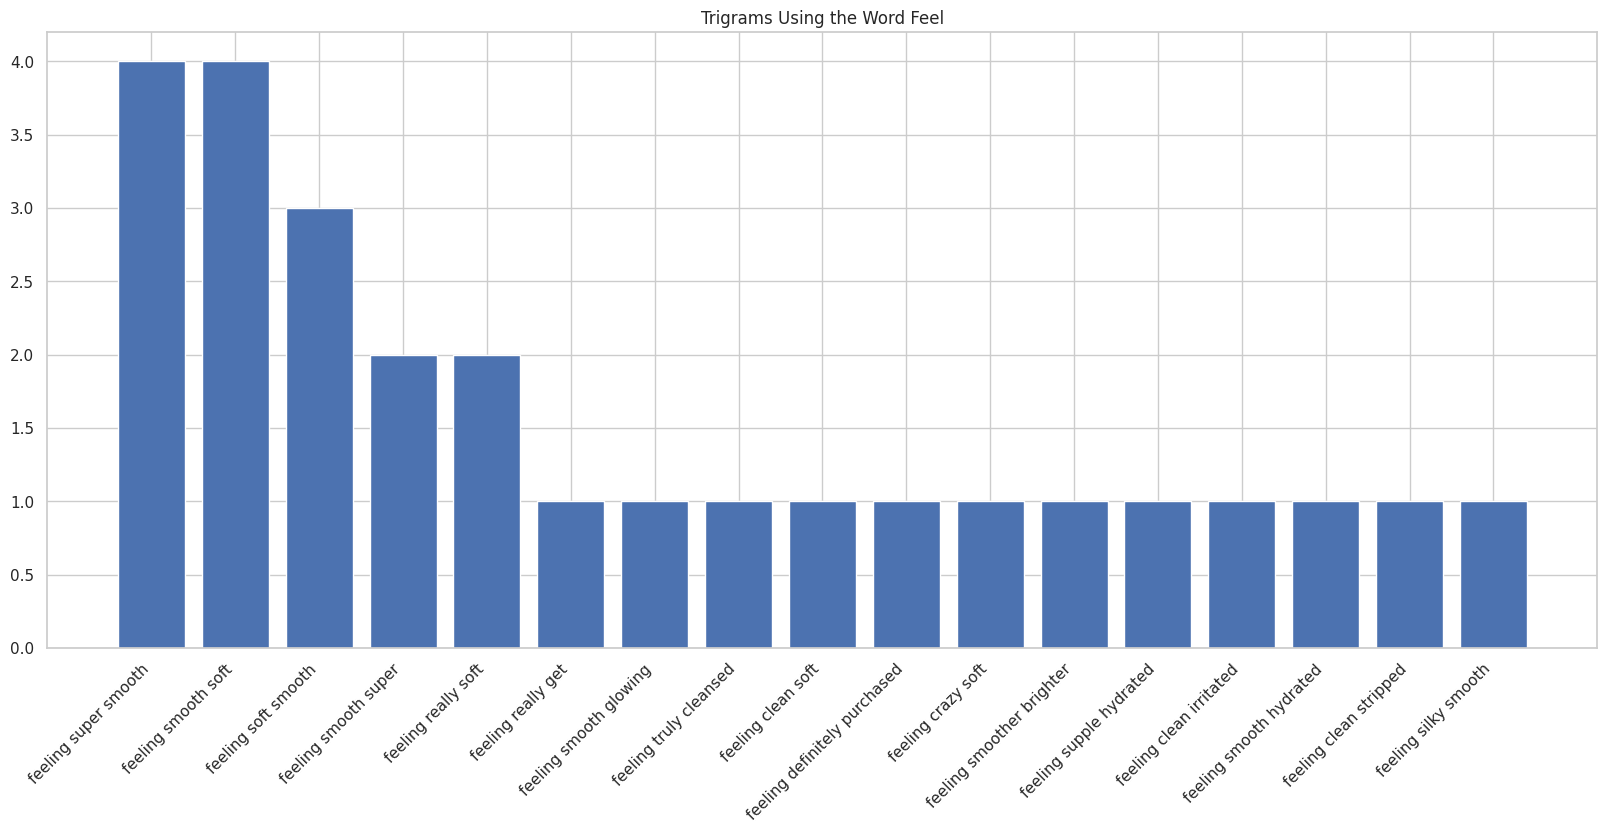

In [60]:
# Membuat figure baru dengan ukuran 10x8 inch
plt.figure(figsize=(20, 8))

# Membuat bar plot
plt.bar(df_feel_tr['Trigram'], height=df_feel_tr['Frequency'])

# Memberikan judul pada plot
plt.title('Trigrams Using the Word Feel')

# Memutar label sumbu x sebesar 90 derajat
plt.xticks(rotation=90)

# Mengatur posisi label sumbu x menjadi menyamping
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

# Menampilkan plot
plt.show()

* Grafik tersebut menampilkan frekuensi dari trigram yang mengandung kata "feeling". Dapat dilihat bahwa trigram yang paling sering muncul adalah "feeling super smooth". Trigram lainnya yang cukup sering muncul adalah "feeling smooth soft", "feel soft smooth", "feeling smooth super", dan "feeling really soft". Hal ini dapat memberikan insight tentang bagaimana penggunaan bahasa dan frasa dalam menggambarkan setelah menggunakan produk.

In [61]:
print(df1['Review_Text'].sample(5))


2315    best exfoliant ever used skin smooth feel clea...
3967    problem dead skin even using cleanser exfoliat...
1654    started using exfoliant fall getting hyperpigm...
2088    little dab using week tell huge difference ski...
649     loved lightweight cucumber smell mask also lov...
Name: Review_Text, dtype: object


In [62]:
for i in list(np.random.randint(0,len(df1),5)):
    print('Original: ', df1.iloc[i,1])
    print('Preprocessed: ', df1.iloc[i,4])
    print('Removed Stopword and stemmered: ', df1.iloc[i,5])
    print('-'*50)

Original:  fairly light scrub aggressive face use daily formula incredible help clean skin free imperfection pore visibly smaller amazing totally recommend product need try
Preprocessed:  San Diego, CA
Removed Stopword and stemmered:  0
--------------------------------------------------
Original:  love texture
Preprocessed:  Undisclosed
Removed Stopword and stemmered:  0
--------------------------------------------------
Original:  thought dry skin used realized dead skin safe enough use every day dy make skin sensitized clean clear
Preprocessed:  Mke
Removed Stopword and stemmered:  4
--------------------------------------------------
Original:  skin never felt smoother using daily superfoliant take dead skin easily harsh skin noticed reduction blemish acne overall great product
Preprocessed:  Bromley
Removed Stopword and stemmered:  0
--------------------------------------------------
Original:  blind purchase knew loved microfoliant may love even get congestion chin clear right feel

* Tujuan dari code tersebut adalah untuk menampilkan 5 review secara acak beserta dengan hasil preprocessing yang telah dilakukan pada masing-masing review, yaitu hasil penghapusan stop word dan stemming. Dengan cara ini,dapat memeriksa secara visual apakah preprocessing yang dilakukan sudah sesuai.

In [63]:
# teks dengan stopword (kolom preprocess)

# slicing
negatif_prep = df1[df1.Verified_Buyer==0]['Review_Text']
positif_prep = df1[df1.Verified_Buyer==1]['Review_Text'].sample(160, random_state=0)

# merge dalam satu bracket list
join_neg_prep = '. '.join(list(negatif_prep.values))
join_pos_prep = '. '.join(list(positif_prep.values))

# menyiapkan file .txt untuk TextRank Similarity
# sentimen negatif
with open('join_neg_prep.txt', 'w') as f:
    f.write(join_neg_prep)
# sentimen positif
with open('join_pos_prep.txt', 'w') as f:
    f.write(join_pos_prep)

* Code diatas memiliki tujuan untuk mempersiapkan data yang akan digunakan pada TextRank Similarity dengan menggunakan metode slicing untuk memisahkan antara review yang memiliki label Verified Buyer positif dan negatif. Kemudian dilakukan penggabungan kembali pada review yang sudah dipreprocessing dengan menggunakan join dan dilakukan penyimpanan pada file .txt untuk selanjutnya akan digunakan pada tahap TextRank Similarity.

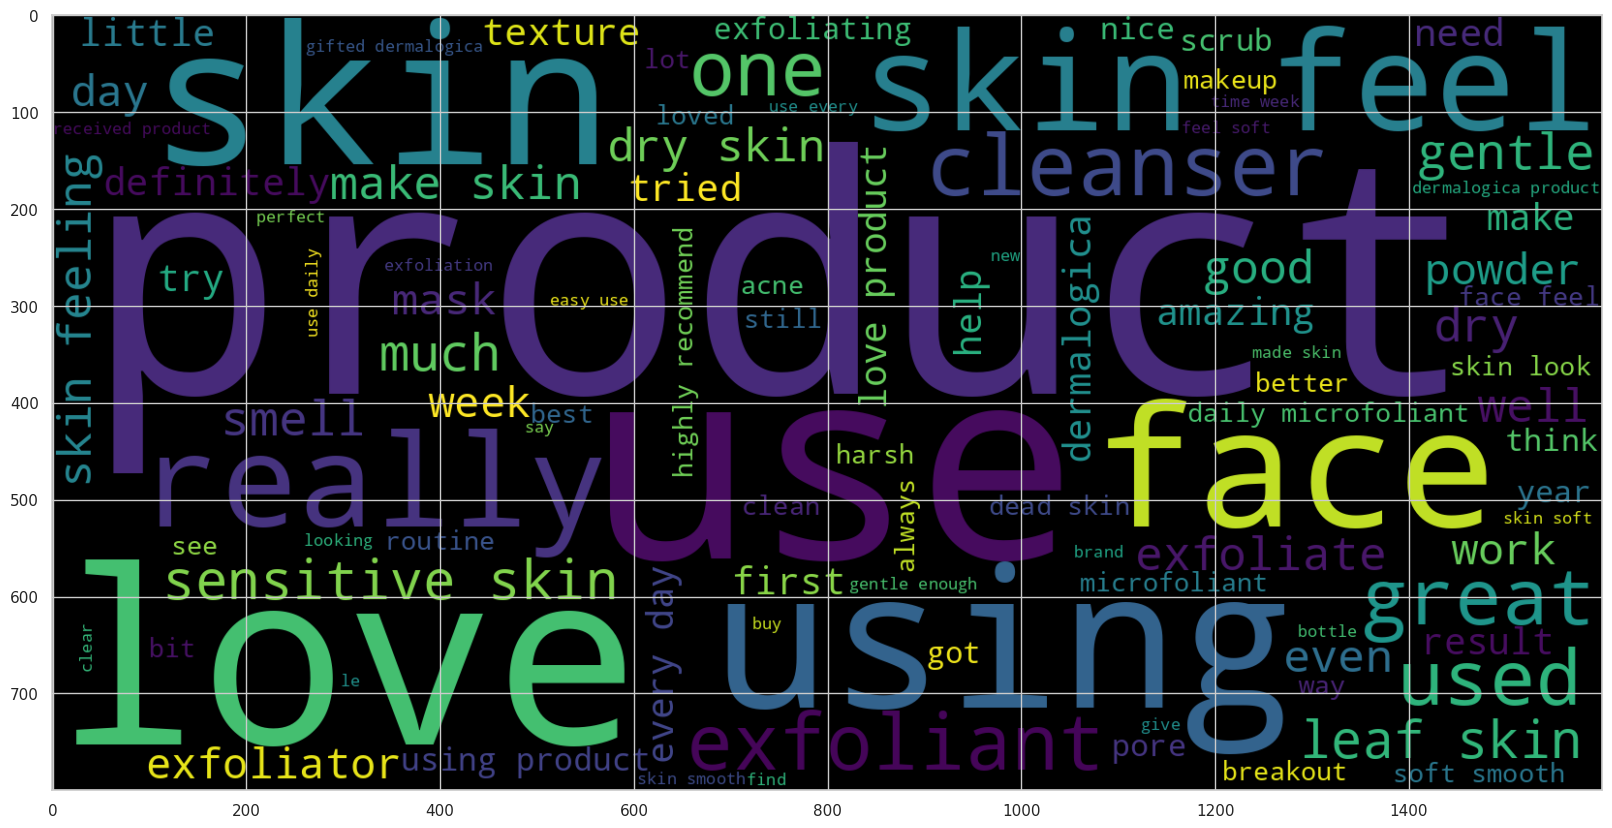

In [64]:
# sentimen negatif dengan stopword
plt.figure(figsize = (20,20)) 

w_cloud = WordCloud(background_color='black', min_font_size = 3,
                    max_words = 100 , width = 1600 ,
                    height = 800).generate(" ".join(negatif_prep))

plt.imshow(w_cloud,interpolation = 'bilinear')

* Tujuan dari kode diats adalah untuk membuat WordCloud (nuage de mots) dari kumpulan data review dengan label "negatif" (non verified buyer) dan menunjukkan visualisasi dari kata-kata yang paling sering muncul dalam kumpulan data tersebut. WordCloud biasanya digunakan untuk memvisualisasikan frekuensi kata dalam teks yang cukup panjang, sehingga memudahkan dalam melihat pola atau tema dari data teks tersebut. Pada kode tersebut, WordCloud dibuat dengan bantuan library WordCloud dan matplotlib pada Python.

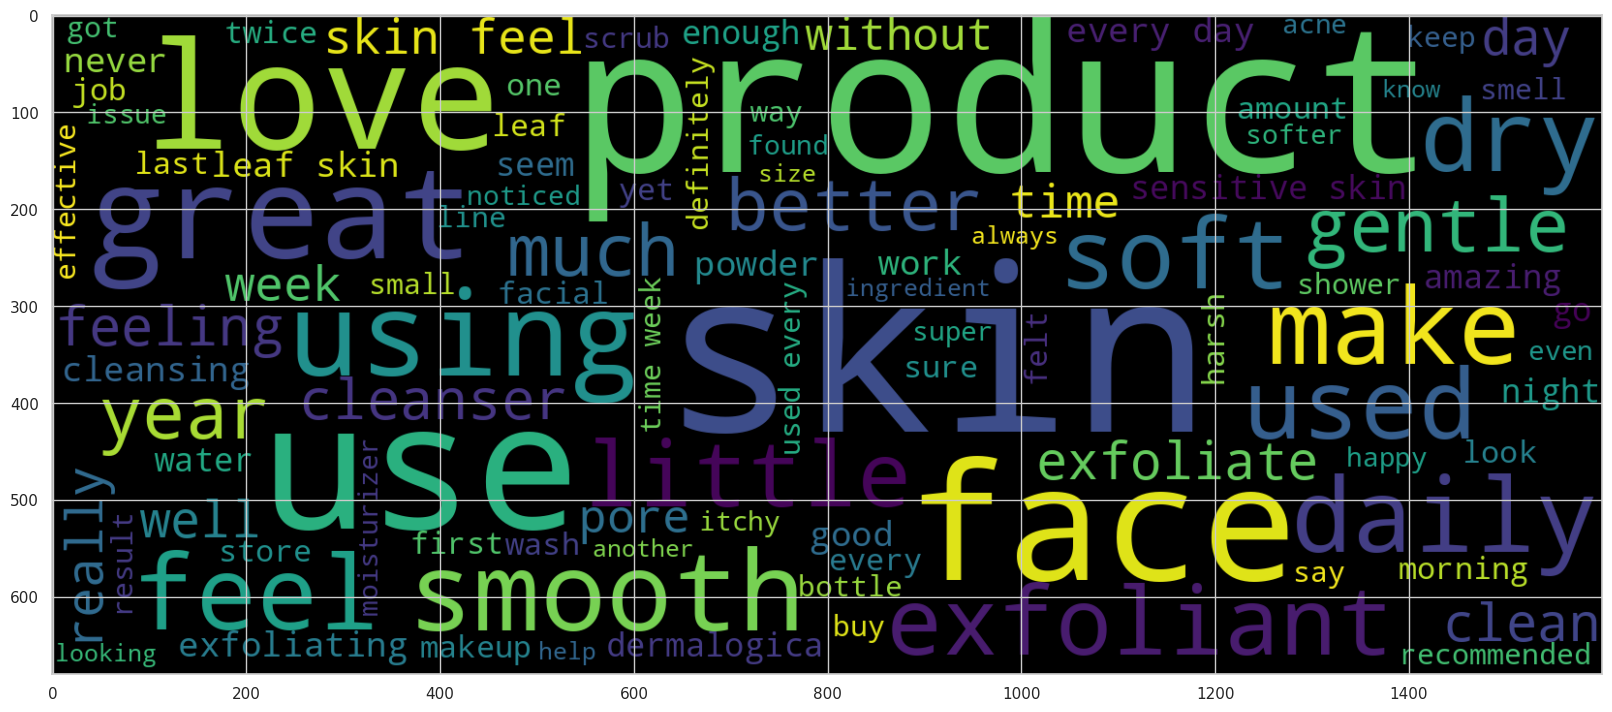

In [65]:
# sentimen positif dengan stopword
plt.figure(figsize = (20,20))

w_cloud = WordCloud(min_font_size = 3,  max_words = 100 ,
                    width = 1600 , height = 680).generate(" ".join(positif_prep))

plt.imshow(w_cloud,interpolation = 'bilinear')

* Tujuan dari kode diatas adalah untuk menampilkan wordcloud dari data review yang memiliki sentimen positif. Wordcloud adalah representasi visual dari kumpulan kata-kata, di mana kata-kata yang sering muncul dalam teks ditampilkan dengan ukuran yang lebih besar. Kode diats menghasilkan sebuah gambar dengan ukuran 20x20 inch yang menampilkan 100 kata paling umum dalam data review yang memiliki sentimen positif.

## Balance Data dengan Manual

* Menggunakan Undersampling, salah satu metode yang digunakan untuk menyeimbangkan dataset dengan mengurangi jumlah sampel pada kelas mayoritas sehingga jumlah sampel pada kedua kelas menjadi seimbang. 

In [66]:
df_nb=df1.copy()

In [67]:
df_0 = df_nb[df_nb['Verified_Buyer']==1]


In [68]:
# membuat sample sebanyak 1239
df_1 = df_nb[df_nb['Verified_Buyer']==0].sample(1239,random_state=42)

In [69]:
# menggabungkan 2 sample dari 2 kelas (1 & 0)
df2 = pd.concat([df_0,df_1],axis=0)
df2.sample(5)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Tokenized_Text,NLTK_Text
1512,Simply the best,product leaf feeling smooth youthful stop buyi...,1,7 months ago,Albuquerque nm,1,0,Daily Superfoliant,Dermalogica,2023-03-27,"[product, leaf, feeling, smooth, youthful, sto...","(product, leaf, feeling, smooth, youthful, sto..."
565,Gimmicky but it actually works,fan bubble first thought pretty gimmicky neces...,0,2 years ago,Florida,0,0,Hydro Masque Exfoliant,Dermalogica,2023-03-27,"[fan, bubble, first, thought, pretty, gimmicky...","(fan, bubble, first, thought, pretty, gimmicky..."
2284,I would buy this product again and again,love refreshes skin,1,5 years ago,Va,0,0,Daily Superfoliant,Dermalogica,2023-03-27,"[love, refreshes, skin]","(love, refreshes, skin)"
1414,Skincare,everything tried brand great definitely would ...,0,5 months ago,Undisclosed,0,0,Daily Superfoliant,Dermalogica,2023-03-27,"[everything, tried, brand, great, definitely, ...","(everything, tried, brand, great, definitely, ..."
3926,"Yes, It Can Be Used Daily!",finally abrasive abrasive exfoliates gently sk...,1,6 years ago,Sacramento CA,1,0,Daily Microfoliant,Dermalogica,2023-03-27,"[finally, abrasive, abrasive, exfoliates, gent...","(finally, abrasive, abrasive, exfoliates, gent..."


In [98]:
# Split Train dan Test
X_train, X_test,  y_train, y_test = train_test_split(df2.Review_Text, df2.Verified_Buyer, test_size=0.2, stratify=df2.Verified_Buyer, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, stratify=y_train, random_state=42)

In [96]:
for i in [X_train, X_test, X_val, y_train, y_test, y_val]:
    print(i.shape)

(1585,)
(496,)
(397,)
(1585,)
(496,)
(397,)


In [99]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
# X_test_vec = Vectorize.transform(X_test)
# X_val_vec = Vectorize.transform(X_val)

X_train_vec

<1585x3071 sparse matrix of type '<class 'numpy.int64'>'
	with 30178 stored elements in Compressed Sparse Row format>

* Tujuan dari code tersebut adalah melakukan proses pembuatan vektor fitur (feature vector) untuk dokumen teks pada data training dengan menggunakan CountVectorizer pada library Scikit-learn. CountVectorizer akan menghitung frekuensi kemunculan setiap kata (token) pada setiap dokumen, kemudian mengubahnya menjadi representasi numerik dalam bentuk matriks. Dalam hal ini, variabel X_train_vec akan berisi matriks vektor fitur hasil dari transformasi CountVectorizer pada data training (X_train).

In [117]:
# Mencari Jumlah Vocab dan Panjang Token dalam Satu DOcument

jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab : ", jml_vocab)
print("Panjang maksimum kalimat : ", max_sen_len, "kata")

Jumlah vocab :  3071
Panjang maksimum kalimat :  183 kata


* Tujuan dari kode tersebut adalah untuk mendapatkan jumlah total vocabulary dan panjang maksimum dari sebuah kalimat yang ada pada data train.

* Pertama, jml_vocab dihitung dengan mengambil jumlah keys pada vocabulary yang telah dibentuk menggunakan objek Vectorize.vocabulary_. Kemudian, max_sen_len dihitung dengan mengambil panjang maksimum sebuah kalimat pada X_train, yang dihitung dengan mengambil jumlah kata dalam sebuah kalimat dengan menggunakan fungsi len dan split(" ") untuk memisahkan tiap kata dalam sebuah kalimat.

In [118]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # menggunakan Sequential API
                                       )

text_vectorization.adapt(X_train)

* Tujuan dari melakukan text vectorization adalah untuk mengubah teks menjadi bentuk numerik sehingga dapat dimasukkan ke dalam model machine learning. Dalam code tersebut, objek text_vectorization dibuat dengan konfigurasi tertentu seperti jumlah token maksimum (max_tokens), menghapus tanda baca (standardize), menggunakan whitespace untuk memisahkan kata (split), tidak menggunakan n-gram (ngrams=None), mengubah output menjadi integer (output_mode), menentukan panjang sequence output (output_sequence_length), dan menentukan input shape (input_shape) menggunakan Sequential API.

In [122]:
# Contoh Text Vectorization

## Contoh Document
print('Contoh Document')
print(df2.Review_Text[56])
print('')

## Hasil Text Vectorization
print('Hasil Text Vectorization')
print(text_vectorization([df2.Review_Text[56]]))
print('Ukuran vector : ', text_vectorization([df2.Review_Text[56]]).shape)

Contoh Document
face feel extra clean smooth love heating effect

Hasil Text Vectorization
tf.Tensor(
[[   7    6  220   14   10    5 2524  393    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   

* Code diataas adalah untuk menunjukkan contoh penggunaan fungsi text_vectorization() dan menampilkan hasilnya untuk satu dokumen (document) dari dataset yang disimpan dalam dataframe df2.

* Bagian pertama code menunjukkan contoh dari satu dokumen pada dataframe df2 dengan memanggil print(df2.Review_Text[56]).

* Bagian kedua code menunjukkan hasil dari text vectorization pada satu dokumen tersebut dengan memanggil text_vectorization([df2.Review_Text[56]]). Fungsi text_vectorization() akan menghasilkan vektor numerik yang merepresentasikan dokumen teks dalam bentuk matrix. Hasil vektor numerik tersebut kemudian ditampilkan dengan memanggil print(text_vectorization([df2.Review_Text[56]])). Selain itu, ukuran vektor numerik tersebut juga ditampilkan dengan memanggil print('Ukuran vector : ', text_vectorization([df2.Review_Text[56]]).shape).

* Dengan menjalankan code tersebut, kita dapat melihat bagaimana fungsi text_vectorization() mengubah teks menjadi vektor numerik dan memberikan representasi matematis dari dokumen teks. Kita juga dapat melihat ukuran dari vektor numerik tersebut, yang menunjukkan jumlah fitur (features) yang digunakan dalam representasi vektor numerik.

In [123]:
# Embedding

embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

* Tujuan dari code tersebut adalah membuat sebuah layer embedding pada model deep learning. Layer embedding ini bertujuan untuk mengubah input data berupa sequence of words menjadi representasi numerik dalam bentuk vector.

* Pada code tersebut, layer embedding diinisialisasi dengan input_dim yang sesuai dengan jumlah vocabulary yang ada dalam dataset, output_dim sebesar 128, dan menggunakan inisialisasi uniform untuk parameter embeddings_initializer. Input_length diberikan dengan nilai max_sen_len, yaitu panjang maksimum dari kalimat dalam dataset. Dengan menggunakan layer embedding, model deep learning dapat memproses input data secara efektif dengan mengonversi sequence of words menjadi representasi vector yang memiliki dimensi yang lebih rendah dan terstruktur.

In [124]:
# Contoh Hasil Embedding

## Contoh Document
print('Contoh Document')
print(df2.Review_Text[56])
print('')

## Hasil Text Vectorization
print('Hasil Text Vectorization')
print(text_vectorization([df2.Review_Text[56]]))
print('Ukuran vector : ', text_vectorization([df2.Review_Text[56]]).shape)
print('')

## Hasil Embedding
print('Hasil Embedding')
print(embedding(text_vectorization([df2.Review_Text[56]])))
print('Ukuran vector : ', embedding(text_vectorization([df2.Review_Text[56]])).shape)

Contoh Document
face feel extra clean smooth love heating effect

Hasil Text Vectorization
tf.Tensor(
[[   7    6  220   14   10    5 2524  393    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   

* Code diatas menghasilkan output berupa contoh document, hasil text vectorization dari document tersebut, ukuran vector dari hasil text vectorization, hasil embedding dari hasil text vectorization, dan ukuran vector dari hasil embedding tersebut. Output tersebut bertujuan untuk memberikan gambaran tentang proses embedding pada dataset yang telah dilakukan sebelumnya.

# V. Model Definition

# GRU

In [100]:
# Model Training dengan Menggunakan GRU
model_gru = Sequential()
model_gru.add(text_vectorization)
model_gru.add(embedding)
model_gru.add(GRU(32, return_sequences=True))
model_gru.add(GRU(32))
model_gru.add(Dense(1,activation='sigmoid'))

model_gru.compile(loss='binary_crossentropy',optimizer='Adam',metrics='accuracy')

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 183)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 183, 128)          393088    
                                                                 
 gru_2 (GRU)                 (None, 183, 32)           15552     
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 415,009
Trainable params: 21,921
Non-trainable params: 393,088
___________________________________________

* Code diatas digunakan untuk melakukan training model Natural Language Processing (NLP) dengan menggunakan layer GRU (Gated Recurrent Unit). GRU merupakan salah satu jenis layer pada Recurrent Neural Network (RNN) yang memiliki kemampuan untuk mempelajari hubungan antar kata dalam teks yang diberikan.

Penjelasan dari code tersebut adalah:

1. membuat sebuah objek Sequential() untuk membangun model secara berurutan. Model di TensorFlow dapat dibangun secara sequential maupun dengan menggunakan objek functional.

2. Kemudian, kita menambahkan layer text_vectorization ke dalam model. Layer ini bertujuan untuk mengubah data teks menjadi data numerik dengan vektorisasi.

3. Selanjutnya, kita menambahkan layer embedding yang berfungsi untuk memetakan setiap kata pada teks ke dalam sebuah vektor numerik.

4. Dilanjutkan dengan menambahkan dua layer GRU yang memiliki 32 unit dan menggunakan return_sequences=True pada layer pertama. return_sequences=True bertujuan untuk mengembalikan output dari setiap timestep dalam sekuen menjadi sebuah sekuen 3D.

5. Terakhir, kita menambahkan sebuah layer dense dengan aktivasi sigmoid untuk mengeluarkan output dengan format kelas biner (0 atau 1).

7. Selanjutnya, dilakukan kompilasi model dengan menggunakan fungsi loss binary_crossentropy, optimizer Adam, dan metrics accuracy.

8. Terakhir, kita mencetak summary dari model yang telah dibuat untuk melihat arsitektur dan parameter-parameter dari model tersebut.

## LSTM

In [119]:
# Model Training dengan Menggunakan LSTM

model_lstm = Sequential()
model_lstm.add(text_vectorization)
model_lstm.add(embedding)
model_lstm.add(LSTM(32, return_sequences=True))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1,activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

model_lstm.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 183)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 183, 128)          393088    
                                                                 
 lstm_4 (LSTM)               (None, 183, 32)           20608     
                                                                 
 dropout (Dropout)           (None, 183, 32)           0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                      

* Code tersebut merupakan implementasi dari model jaringan saraf rekuren (RNN) dengan tipe LSTM (Long Short-Term Memory) untuk melakukan klasifikasi teks biner (binary text classification).

1. Sequential(): Untuk membuat model sequantial.
text_vectorization: Untuk melakukan vectorization pada teks, yaitu mengubah teks menjadi vektor numerik.
2. embedding: Untuk mengubah vektor numerik hasil vectorization menjadi vektor dengan dimensi yang lebih rendah sehingga memudahkan proses training model.
3. LSTM(32, return_sequences=True): Untuk menambahkan layer LSTM pada model dengan 32 unit LSTM dan return_sequences=True karena output layer sebelumnya juga return_sequences=True.
4. LSTM(32): Untuk menambahkan layer LSTM pada model dengan 32 unit LSTM dan return_sequences=False karena output layer sebelumnya sudah return_sequences=True sehingga layer ini akan menerima sequence of vectors.
5. Dense(1, activation='sigmoid'): Untuk menambahkan layer Dense pada model dengan 1 unit neuron pada output layer untuk menghasilkan prediksi biner dan menggunakan aktivasi sigmoid.
6. Setelah menambahkan layer pada model, dilakukan compile model dengan menggunakan optimizer adam dan loss function binary crossentropy yang cocok digunakan untuk klasifikasi biner. Selain itu, metrics yang digunakan adalah akurasi.

7. Terakhir, dengan menggunakan method summary() dapat dilihat detail dari model yang telah dibuat, yaitu urutan layer-layer yang terdapat pada model beserta jumlah parameter masing-masing layer dan total parameter.

# VII. Model Training

In [102]:
callbacks1 = [
    EarlyStopping(monitor='val_accuracy', patience= 3, restore_best_weights=True)]

* Code tersebut merupakan penggunaan callback pada Keras. Callback pada Keras adalah sebuah fitur yang memungkinkan pengguna untuk memonitor dan memanipulasi perilaku model saat dilatih. Pada code tersebut, digunakan callback EarlyStopping untuk menghentikan pelatihan model jika tidak terjadi peningkatan performa pada validasi selama tiga epoch berturut-turut, dan akan mengembalikan bobot terbaik model. Callback ini digunakan untuk menghindari overfitting dan mempercepat waktu pelatihan model.

## GRU

In [103]:
%%time
history_gru = model_gru.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=callbacks1)

Epoch 1/100
50/50 [==============================] - 15s 213ms/step - loss: 0.6939 - accuracy: 0.4997 - val_loss: 0.6933 - val_accuracy: 0.5013
Epoch 2/100
50/50 [==============================] - 9s 179ms/step - loss: 0.6937 - accuracy: 0.4909 - val_loss: 0.6932 - val_accuracy: 0.5013
Epoch 3/100
50/50 [==============================] - 9s 170ms/step - loss: 0.6934 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.4987
Epoch 4/100
50/50 [==============================] - 10s 197ms/step - loss: 0.6934 - accuracy: 0.5060 - val_loss: 0.6931 - val_accuracy: 0.5013
CPU times: user 58.4 s, sys: 1.4 s, total: 59.8 s
Wall time: 42 s


* model_gru.fit() digunakan untuk melatih model GRU pada data training (X_train dan y_train), dengan melakukan iterasi sebanyak epochs yang diberikan (di sini di-set sebanyak 100 epochs), dan menggunakan data validasi (X_val dan y_val) untuk mengevaluasi performa model pada setiap epoch. 


total time = 59.8 s 
loss = 0.6934
val loss = 0.6931 
accuracy = 0.5060 
val_accuracy = 0.5013

it can be concluded that we managed to improve the model


## LSTM

In [121]:
%%time
history_lstm = model_lstm.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=callbacks1)

Epoch 1/100
50/50 [==============================] - 11s 213ms/step - loss: 0.6942 - accuracy: 0.4946 - val_loss: 0.6932 - val_accuracy: 0.4987
Epoch 2/100
50/50 [==============================] - 8s 155ms/step - loss: 0.6941 - accuracy: 0.4719 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 3/100
50/50 [==============================] - 10s 194ms/step - loss: 0.6933 - accuracy: 0.4965 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 4/100
50/50 [==============================] - 10s 198ms/step - loss: 0.6937 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.4987
Epoch 5/100
50/50 [==============================] - 8s 156ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.4987
CPU times: user 1min 6s, sys: 1.87 s, total: 1min 8s
Wall time: 45.8 s


* melatih (train) model LSTM pada data yang telah diproses menjadi bentuk numerik (vector) dan labelnya.

* X_train adalah input (fitur) yang telah di-tokenisasi dan diubah menjadi vektor numerik, sedangkan y_train adalah label yang sesuai dengan input tersebut. Model LSTM akan dipelajari pada data pelatihan ini selama 100 epoch (iterasi) dengan batch size default, dan akan dievaluasi pada data validasi yang disediakan di validation_data.

* Selama pelatihan, callback yang telah ditentukan dalam callbacks1 akan dijalankan setiap kali epoch berakhir. Callback adalah fungsi yang dipanggil selama proses pelatihan berlangsung, misalnya untuk menghentikan proses pelatihan ketika model telah mencapai performa yang diinginkan, atau untuk menyimpan checkpoint model yang terbaik selama proses pelatihan.

* Ketika proses pelatihan selesai, objek history_lstm akan berisi informasi tentang performa model selama pelatihan seperti loss dan akurasi pada setiap epoch. Penggunaan %%time di awal cell bertujuan untuk mengukur waktu yang diperlukan untuk menyelesaikan proses pelatihan model LSTM.








total time = 45.8 s
loss = 0.6932 
val loss = 0.6932
accuracy = 0.4984 
val_accuracy = 0.4987

# VIII. Model Evaluation

In [105]:
history_model_df = pd.DataFrame(history_lstm.history)

<Axes: >

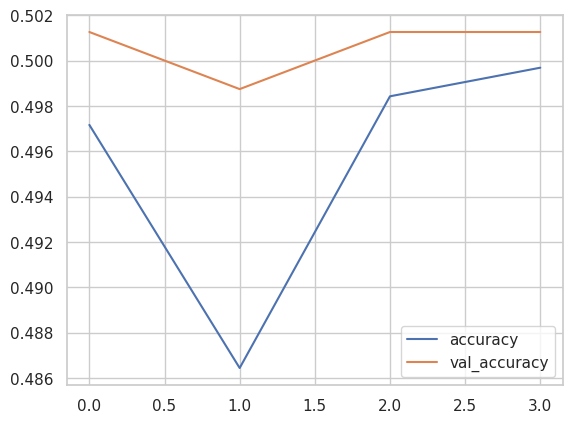

In [106]:
history_model_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

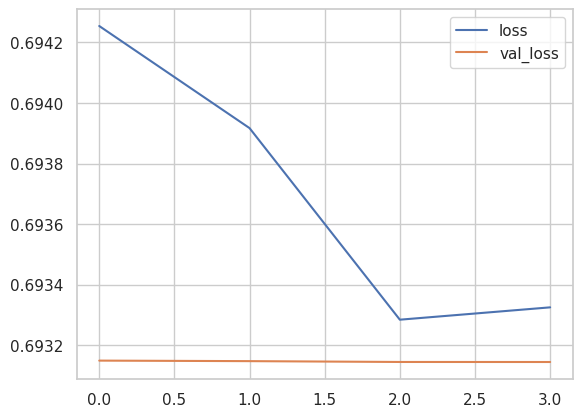

In [107]:
history_model_df[['loss', 'val_loss']].plot()

In [108]:
y_pred2 = model_lstm.predict(X_test)
y_pred2 = np.where(y_pred2 >=0.5, 1, 0)
print(classification_report(y_test, y_pred2))

16/16 [==============================] - 1s 37ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       248
           1       0.00      0.00      0.00       248

    accuracy                           0.50       496
   macro avg       0.25      0.50      0.33       496
weighted avg       0.25      0.50      0.33       496



Text(91.25, 0.5, 'True Label')

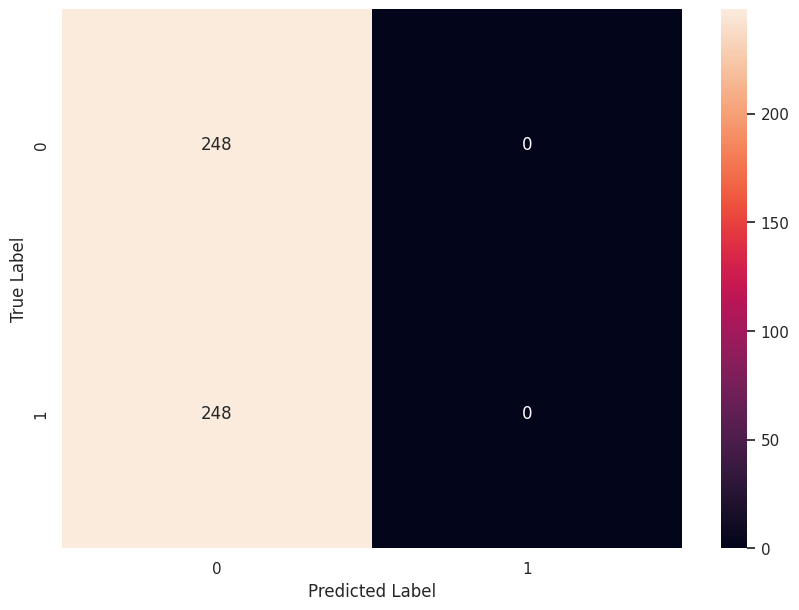

In [109]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred2)
plt.figure(figsize = (10,7))
sns.heatmap(cm2, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

* Berdasarkan ke 2 lineplot dikatakan vanishing gradient dan cenderung menuju sedikit good fit karena antara train dan val akurasi nilainya berjauhan begitupun dengan 'loss', 'val_loss'.

* Tujuan bisnisnya adalah untuk memaksimalkan jumlah review yang diklasifikasikan dengan benar sebagai verified, maka metrik evaluasi yang tepat adalah recall. Recall mengukur seberapa baik model dalam menemukan semua instance dari kelas positif (dalam hal ini, review yang sebenarnya telah diverifikasi) dari semua instance yang sebenarnya positif. Sehingga, recall akan memberikan informasi tentang seberapa baik model dapat mengidentifikasi review yang sebenarnya telah diverifikasi dari semua review yang sebenarnya telah diverifikasi.
* pada klasifikasi report terlihat model hanya dapat memprediksi kelas 0 (verified buyer) jika kembali ke EDA terlihat bahwa pada dataset ini dengan status verified buyer bisa berkomentar yang terindikasi non-verified buyer yang sebenarnya adalah kategory verified buyer, sehingga pada dataset ini tidak ada pembanding yang cukup signifikan dalam melakukan data uji pada mechine.

## GRU

In [110]:
history_model2_df = pd.DataFrame(history_gru.history)

<Axes: >

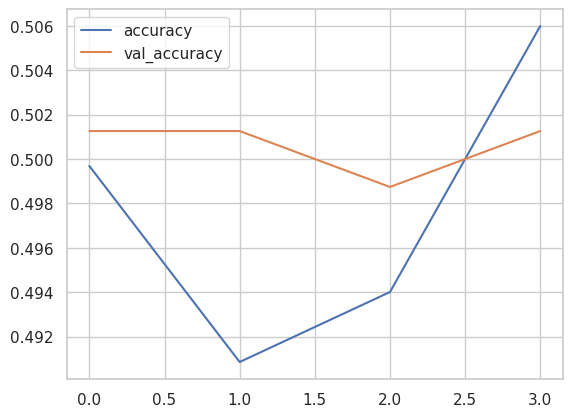

In [111]:
history_model2_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

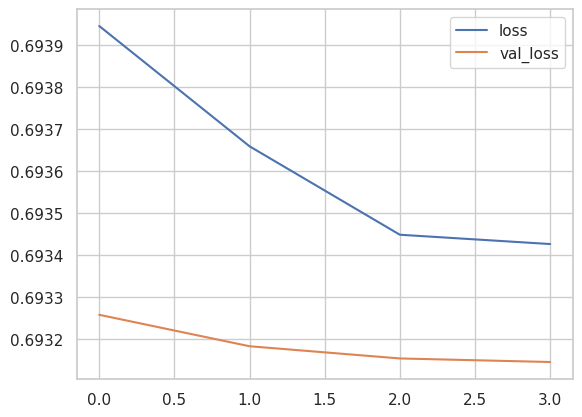

In [112]:
history_model2_df[['loss', 'val_loss']].plot()

In [113]:
y_pred3 = model_gru.predict(X_test)
y_pred3 = np.where(y_pred3 >=0.5, 1, 0)
print(classification_report(y_test, y_pred3))

16/16 [==============================] - 1s 34ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       248
           1       0.00      0.00      0.00       248

    accuracy                           0.50       496
   macro avg       0.25      0.50      0.33       496
weighted avg       0.25      0.50      0.33       496



Text(91.25, 0.5, 'True Label')

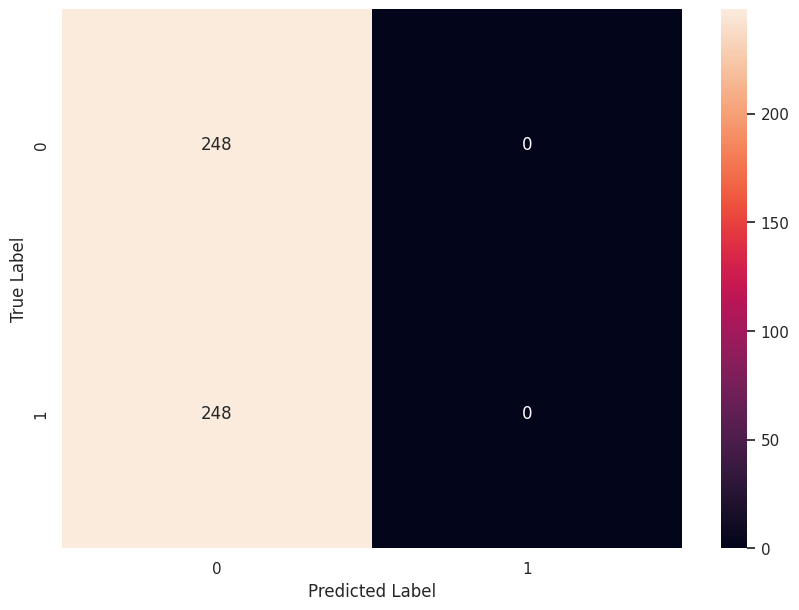

In [114]:
cm3 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred3)
plt.figure(figsize = (10,7))
sns.heatmap(cm3, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

* Berdasarkan ke 2 lineplot dikatakan vanishing gradient dan cenderung menuju sedikit goodfit karena antara train dan val akurasi nilainya berjauhan tetapi tidak signifikan, terdapat begitupun dengan 'loss', 'val_loss'.
jika dilihat kembali pada train dan val akurasi terdapat patahan pada nilai 2.5 patahan tersebut bisa di kategorikan good fit.

* Tujuan bisnisnya adalah untuk memaksimalkan jumlah review yang diklasifikasikan dengan benar sebagai verified, maka metrik evaluasi yang tepat adalah recall. Recall mengukur seberapa baik model dalam menemukan semua instance dari kelas positif (dalam hal ini, review yang sebenarnya telah diverifikasi) dari semua instance yang sebenarnya positif. Sehingga, recall akan memberikan informasi tentang seberapa baik model dapat mengidentifikasi review yang sebenarnya telah diverifikasi dari semua review yang sebenarnya telah diverifikasi.

* pada klasifikasi report terlihat model hanya dapat memprediksi kelas 0 (verified buyer) jika kembali ke EDA terlihat bahwa pada dataset ini dengan status verified buyer bisa berkomentar yang terindikasi non-verified buyer yang sebenarnya adalah kategory verified buyer, sehingga pada dataset ini tidak ada pembanding yang cukup signifikan dalam melakukan data uji pada mechine.

# IX. Model Saving

In [115]:
# Freeze Model
model_gru.trainable = False
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 183)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 183, 128)          393088    
                                                                 
 gru_2 (GRU)                 (None, 183, 32)           15552     
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 415,009
Trainable params: 0
Non-trainable params: 415,009
________________________________________________

In [116]:
# Save Model 
model_gru.save('model_lstm')

# X. Conclusion

*  Tujuan bisnisnya adalah untuk memaksimalkan jumlah review yang diklasifikasikan dengan benar sebagai verified, maka metrik evaluasi yang tepat adalah recall. Recall mengukur seberapa baik model dalam menemukan semua instance dari kelas positif (dalam hal ini, review yang sebenarnya telah diverifikasi) dari semua instance yang sebenarnya positif. Sehingga, recall akan memberikan informasi tentang seberapa baik model dapat mengidentifikasi review yang sebenarnya telah diverifikasi dari semua review yang sebenarnya telah diverifikasi.
* Setelah dilakukan beberapa cara dalam pengerjaan model, model masih tidak dapat bekerja dalam memprediksi dengan baik.
* Jika di lihat dari dataset dan melihat dari analysis EDA yang telah dilakukan sebagai verifide buyer masih bisa memberikan review negative, verified buyer tidak selalu memberikan review yang positif,makadari itu tidak ada pembanding cukup signifikan dalam melakukan data uji oleh mechine.sehingga menurut saya ini bisa menjadi salah satu indikasi bahwa model tidak dapat memprediksi dengan baik.
* Dataset berikut terdapat label atau data yang tidak seimbang, dalam preprocess telah menggunakan teknik seperti undersampling untuk mengatasi masalah ini, tetapi model masih tidak cukup baik
* metode yang digunakan dalam preprocessing dapat menghasilkan representasi yang memadai dan relevan dari dokumen atau teks yang akan diproses. Metode yang digunakan dalam preprocessing dapat mencakup tokenisasi, penghilangan stop word, stemming, dan pembuatan n-gram.

*hasil prediksi yang masih masih tidak baik meskipun sudah melakukan beberapa model berikut adalah cara yang bisa di coba:*

* jika di lihat dari data base ini data cenderung sedikit sehingga bisa menambahkan data training. Semakin banyak data yang digunakan untuk melatih model, semakin akurat model yang dihasilkan.
* tambahkan fitur-fitur baru. Fitur-fitur baru yang relevan dapat membantu meningkatkan performa model.
* melakukan Lakukan augmentasi data. Jika dataset yang digunakan terlalu kecil atau tidak cukup representatif, maka augmentasi data dapat dilakukan dengan membuat variasi dari dataset yang ada atau dengan membuat dataset baru yang sejenis.










----

# Sisi bisnis yg butuh ditingkatkan:

* Sebagai seorang data scientist, ada beberapa saran yang dapat Anda berikan kepada perusahaan jika hasil prediksi NLP yang dihasilkan dari model yang dibuat tidak cukup baik dengan jumlah data yang sedikit:

  * Perluasan Data - Anda dapat menyarankan perusahaan untuk mengumpulkan lebih banyak data terkait topik yang ingin diprediksi. Semakin banyak data yang dikumpulkan, semakin akurat hasil prediksi yang dihasilkan.

  * Peningkatan Kualitas Data - Selain itu, perusahaan dapat memperbaiki kualitas data yang ada dengan membersihkan, menghilangkan data duplikat atau data yang tidak relevan.

  * Penggunaan Teknik NLP yang Lebih Kompleks - Jika jumlah data tidak dapat ditingkatkan, perusahaan dapat mencoba menggunakan teknik NLP yang lebih kompleks, seperti penggunaan model deep learning. Namun, teknik yang lebih kompleks juga membutuhkan waktu dan sumber daya yang lebih banyak.

  * Menyesuaikan Tujuan - Jika prediksi tidak dapat ditingkatkan, perusahaan harus meninjau kembali tujuan dari penggunaan NLP dan melihat apakah tujuan tersebut masih layak dicapai dengan data dan model yang ada. Mungkin ada alternatif lain yang dapat digunakan untuk mencapai tujuan yang sama.

  * Dapat melakukan evaluasi kembali terhadap website yang telah di buat dengan menerapkan karakteristik sebagai berikut:
    * Mudah dinavigasi - website yang mudah dinavigasi dengan tata letak yang jelas dan intuitif memudahkan pengguna untuk menemukan informasi yang mereka cari.
    * Interaktif - website yang interaktif dapat meningkatkan keterlibatan pengguna dan memberikan pengalaman yang lebih menarik.
    * Dukungan pelanggan - website yang menyediakan dukungan pelanggan yang responsif dan berkualitas dapat membantu pengguna dalam mengatasi masalah atau pertanyaan yang mereka miliki.
    * Desain yang menarik - website yang memiliki desain menarik dan estetis dapat meningkatkan keterlibatan pengguna dan menciptakan pengalaman yang lebih baik.









